In [1]:
import os

# Directory containing the Excel files
directory = "datasets"

# List all files in the directory
files = os.listdir(directory)

# Print the list of files
print(files)


['dataset4.xlsx', 'dataset5.xlsx', 'dataset6.xlsx', 'dataset7.xlsx', 'dataset8.xlsx', 'dataset9.xlsx', 'dataset_1_2_3_combined.xlsx']


In [2]:
import pandas as pd
# Directory containing the Excel files
directory = "datasets"

# List to store data from each Excel file
data_frames = []

# Loop through all files in the directory
for file in os.listdir(directory):
    if file.endswith(".xlsx") or file.endswith(".xls"):
        file_path = os.path.join(directory, file)
        df = pd.read_excel(file_path)  # Read each Excel file into a DataFrame
        
        # Clean the column names by removing leading/trailing spaces and standardizing them
        df.columns = df.columns.str.strip()  # Strip any leading/trailing spaces
        df.columns = df.columns.str.replace(' ', '_')  # Replace spaces with underscores
        df.columns = df.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)  # Remove any non-alphanumeric characters

        # Append the DataFrame to the list
        data_frames.append(df)

# Combine all DataFrames into one
data = pd.concat(data_frames, ignore_index=True)

# Print the cleaned and combined DataFrame
print(data)


             ID              Name               Role  \
0       uppaup1       Alice Smith  Software Engineer   
1       uppaup2        Hank Brown  Software Engineer   
2       uppaup3         Bob Jones     Data Scientist   
3       uppaup4        Bob Miller  Software Engineer   
4       uppaup5         Ivy Jones      Data Engineer   
...         ...               ...                ...   
3169   ananba44     ananya bansal      data engineer   
3170  diyasi576        diya singh    product manager   
3171  harska507  harshitha kapoor        ui engineer   
3172  kabich225      kabir chopra  software engineer   
3173  aditsi182      aditya singh  software engineer   

                                             Transcript  \
0     Here's a simulated interview for a Software En...   
1     Here's a simulated interview for a Software En...   
2     Here's a simulated interview for a Data Scient...   
3     Here's a simulated interview for a Software En...   
4     Here's a simulated intervi

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt



In [4]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       3174 non-null   object
 1   Name                     3174 non-null   object
 2   Role                     3174 non-null   object
 3   Transcript               3174 non-null   object
 4   Resume                   3174 non-null   object
 5   decision                 3174 non-null   object
 6   Reason_for_decision      3174 non-null   object
 7   Job_Description          3174 non-null   object
 8   num_words_in_transcript  3174 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 223.3+ KB
None
       num_words_in_transcript
count              3174.000000
mean                676.577820
std                 139.509325
min                  62.000000
25%                 574.000000
50%                 679.000000
75%                 773.000000
max   

In [5]:
# Checking for missing values
print(data.isnull().sum())

ID                         0
Name                       0
Role                       0
Transcript                 0
Resume                     0
decision                   0
Reason_for_decision        0
Job_Description            0
num_words_in_transcript    0
dtype: int64


In [6]:
# Calculate resume and job description similarity (Cosine Similarity)
vectorizer = TfidfVectorizer()
resume_jd_similarity = []
for i in range(len(data)):
    resume = data['Resume'][i]
    jd = data['Job_Description'][i]
    similarity = cosine_similarity(vectorizer.fit_transform([resume, jd]))[0, 1]
    resume_jd_similarity.append(similarity)
data['resume_jd_similarity'] = resume_jd_similarity

In [7]:
# Calculate resume and transcript similarity (Cosine Similarity)
resume_transcript_similarity = []
for i in range(len(data)):
    resume = data['Resume'][i]
    transcript = data['Transcript'][i]
    similarity = cosine_similarity(vectorizer.fit_transform([resume, transcript]))[0, 1]
    resume_transcript_similarity.append(similarity)
data['resume_transcript_similarity'] = resume_transcript_similarity


In [8]:
data

,ID,Name,Role,Transcript,Resume,decision,Reason_for_decision,Job_Description,num_words_in_transcript,resume_jd_similarity,resume_transcript_similarity
0,uppaup1,Alice Smith,Software Engineer,Here's a simulated interview for a Software En...,Here's a sample resume for Alice Smith:\n\n**A...,reject,Unsatisfactory references or background check.,Here is a comprehensive job description for a ...,528,0.552990,0.365774
1,uppaup2,Hank Brown,Software Engineer,Here's a simulated interview for a Software En...,"Here's a resume for Hank Brown, a select candi...",select,Growth mindset and adaptability.,Here is a job description for a Software Engin...,804,0.345283,0.499810
2,uppaup3,Bob Jones,Data Scientist,Here's a simulated interview for a Data Scient...,"Here's a sample resume for Bob Jones, who appl...",reject,Inadequate communication or interpersonal skills.,Here is a comprehensive job description for a ...,503,0.666840,0.512985
3,uppaup4,Bob Miller,Software Engineer,Here's a simulated interview for a Software En...,"Here's a sample resume for Bob Miller, a Softw...",select,Strong cultural fit.,Here is a sample job description for a Softwar...,665,0.533122,0.456622
4,uppaup5,Ivy Jones,Data Engineer,Here's a simulated interview for a Data Engine...,Here's a sample resume for Ivy Jones:\n\n**Ivy...,reject,Lack of relevant skills or experience.,Here is a sample job description for a Data En...,573,0.597536,0.394706
...,...,...,...,...,...,...,...,...,...,...,...
3169,ananba44,ananya bansal,data engineer,here's a realistic interview transcript for th...,ananya bansal\ncontact information:\n\n* phone...,select,experience gap,\n we are seeking a qualified data engi...,786,0.337360,0.500792
3170,diyasi576,diya singh,product manager,interview transcript for product manager role\...,diya singh\ncontact information:\n\n* email: [...,reject,business acumen,\n we are seeking a qualified product m...,735,0.324334,0.533692
3171,harska507,harshitha kapoor,ui engineer,"interviewer: hi harshitha, thanks for coming i...",harshitha kapoor\nui engineer\n\ncontact infor...,select,cultural fit,\n we are seeking a qualified ui engine...,913,0.351762,0.361235
3172,kabich225,kabir chopra,software engineer,here's a realistic interview transcript for ka...,kabir chopra\ncontact information:\n\n* email:...,reject,technical knowledge,\n we are seeking a qualified software ...,806,0.254393,0.411042


In [200]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Lists to store sentiment results
sentiments = []
polarity = []

# Perform sentiment analysis on each transcript
for i in range(len(data)):
    transcript = data['Transcript'][i]
    sentiment_score = sia.polarity_scores(transcript)
    sentiments.append(sentiment_score['compound'])  # Compound sentiment score
    polarity.append('positive' if sentiment_score['compound'] > 0 
                    else 'negative' if sentiment_score['compound'] < 0 
                    else 'neutral')

# Add the results to the DataFrame
data['sentiment'] = sentiments
data['polarity'] = polarity

# Count of each sentiment category
polarity_counts = data['polarity'].value_counts()
print("\n2. Sentiment Polarity Distribution:")
for polarity, count in polarity_counts.items():
    print(f"   - {polarity.capitalize()}: {count} occurrences ({(count / len(data) * 100):.2f}%)")

# Overall average sentiment score
average_sentiment = data['sentiment'].mean()
print(f"\n3. Overall Average Sentiment Score: {average_sentiment:.2f}")
if average_sentiment > 0:
    print("   - The overall sentiment of the transcripts is positive.")
elif average_sentiment < 0:
    print("   - The overall sentiment of the transcripts is negative.")
else:
    print("   - The overall sentiment of the transcripts is neutral.")



2. Sentiment Polarity Distribution:
   - Positive: 3173 occurrences (99.97%)
   - Negative: 1 occurrences (0.03%)

3. Overall Average Sentiment Score: 1.00
   - The overall sentiment of the transcripts is positive.


In [199]:
# Function to calculate lexical diversity
def lexical_diversity(text):
    words = text.split()
    return len(set(words)) / len(words)

# Compute lexical diversity for each transcript
data['lexical_diversity'] = data['Transcript'].apply(lexical_diversity)

# Calculate statistics
average_diversity = data['lexical_diversity'].mean()


In [198]:
# Length of transcript (number of words)
data['transcript_length'] = data['Transcript'].apply(lambda x: len(x.split()))

# Calculate statistics
average_length = data['transcript_length'].mean()
min_length = data['transcript_length'].min()
max_length = data['transcript_length'].max()


In [13]:
# Encoding the target variable (select/reject)
le = LabelEncoder()
data['decision'] = le.fit_transform(data['decision'])  # 0: reject, 1: select


In [115]:
# Function to compute similarity score between Resume and Job Description
def compute_similarity(text1, text2):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform([text1, text2])
    return cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

# Calculate technical skill matching score
data['technical_skill_match'] = data.apply(lambda row: compute_similarity(row['Resume'], row['Job_Description']), axis=1)


In [15]:
# Select features (X) and target variable (Y)
X = data[['resume_jd_similarity', 'resume_transcript_similarity', 'sentiment', 'transcript_length']]
y = data['decision']

In [16]:
#Soft Skills
from textblob import TextBlob

data['soft_skills_sentiment'] = data['Transcript'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [17]:
# Resume length (number of words)
data['resume_length'] = data['Resume'].apply(lambda x: len(x.split()))

In [18]:
# Job Description Experience Match (Simple matching based on keywords, could be improved)
data['job_description_experience_match'] = data.apply(lambda row: len(set(row['Resume'].split()) & set(row['Job_Description'].split())), axis=1)


In [19]:
#Cultural fit sentiment
data['cultural_fit_sentiment'] = data['Reason_for_decision'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [20]:
#job score
def job_fit_analysis(job_desc, transcript):
    # You can use similarity or keyword matching here
    job_keywords = job_desc.split()
    transcript_keywords = transcript.split()
    common_keywords = set(job_keywords).intersection(transcript_keywords)
    return len(common_keywords) / len(job_keywords)

data['job_fit_score'] = data.apply(lambda row: job_fit_analysis(row['Job_Description'], row['Transcript']), axis=1)


In [21]:
#confidence score
data['confidence_score'] = data['Transcript'].apply(lambda x: x.count('I think') + x.count('Maybe'))


In [22]:
#job description complexity
data['job_desc_complexity'] = data['Job_Description'].apply(lambda x: textstat.flesch_reading_ease(x))


In [23]:
#interaction quality
data['interaction_quality'] = data['num_words_in_transcript'] * data['sentiment']


In [201]:
#clarity score
import textstat

data['clarity_score'] = data['Transcript'].apply(lambda x: textstat.flesch_reading_ease(x))


In [25]:
# Text complexity (resume and transcript - using a simple metric like Flesch Reading Ease)
def text_complexity(text):
    # Implement text complexity (e.g., Flesch Reading Ease)
    # Here's a placeholder function:
    return len(text.split()) / len(set(text.split()))  # A basic metric

data['text_complexity_transcript'] = data['Transcript'].apply(text_complexity)
data['text_complexity_resume'] = data['Resume'].apply(text_complexity)


In [118]:
data

,ID,Name,Role,Transcript,Resume,decision,Reason_for_decision,Job_Description,num_words_in_transcript,resume_jd_similarity,...,resume_length,job_description_experience_match,cultural_fit_sentiment,job_fit_score,confidence_score,job_desc_complexity,interaction_quality,clarity_score,text_complexity_transcript,text_complexity_resume
0,uppaup1,Alice Smith,Software Engineer,Here's a simulated interview for a Software En...,Here's a sample resume for Alice Smith:\n\n**A...,0,Unsatisfactory references or background check.,Here is a comprehensive job description for a ...,528,0.552990,...,390,56,0.000000,0.087189,6,-29.97,526.8912,68.87,1.960432,1.511628
1,uppaup2,Hank Brown,Software Engineer,Here's a simulated interview for a Software En...,"Here's a resume for Hank Brown, a select candi...",1,Growth mindset and adaptability.,Here is a job description for a Software Engin...,804,0.345283,...,386,27,0.000000,0.256098,1,30.91,803.6784,53.71,2.098734,1.473282
2,uppaup3,Bob Jones,Data Scientist,Here's a simulated interview for a Data Scient...,"Here's a sample resume for Bob Jones, who appl...",0,Inadequate communication or interpersonal skills.,Here is a comprehensive job description for a ...,503,0.666840,...,445,78,0.000000,0.094828,3,16.76,501.3904,75.91,1.853047,1.642066
3,uppaup4,Bob Miller,Software Engineer,Here's a simulated interview for a Software En...,"Here's a sample resume for Bob Miller, a Softw...",1,Strong cultural fit.,Here is a sample job description for a Softwar...,665,0.533122,...,371,54,0.311111,0.158436,0,-55.55,663.8695,57.27,2.160883,1.565401
4,uppaup5,Ivy Jones,Data Engineer,Here's a simulated interview for a Data Engine...,Here's a sample resume for Ivy Jones:\n\n**Ivy...,0,Lack of relevant skills or experience.,Here is a sample job description for a Data En...,573,0.597536,...,386,57,0.400000,0.082892,4,-40.53,570.7653,65.32,2.122302,1.642553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,ananba44,ananya bansal,data engineer,here's a realistic interview transcript for th...,ananya bansal\ncontact information:\n\n* phone...,1,experience gap,\n we are seeking a qualified data engi...,786,0.337360,...,344,12,0.000000,0.428571,0,28.33,784.4280,66.44,2.153425,1.965714
3170,diyasi576,diya singh,product manager,interview transcript for product manager role\...,diya singh\ncontact information:\n\n* email: [...,0,business acumen,\n we are seeking a qualified product m...,735,0.324334,...,358,12,0.000000,0.567568,0,27.32,734.4120,53.71,2.130435,2.251572
3171,harska507,harshitha kapoor,ui engineer,"interviewer: hi harshitha, thanks for coming i...",harshitha kapoor\nui engineer\n\ncontact infor...,1,cultural fit,\n we are seeking a qualified ui engine...,913,0.351762,...,347,16,0.250000,0.500000,0,18.35,912.6348,65.22,2.243243,1.816754
3172,kabich225,kabir chopra,software engineer,here's a realistic interview transcript for ka...,kabir chopra\ncontact information:\n\n* email:...,0,technical knowledge,\n we are seeking a qualified software ...,806,0.254393,...,268,14,0.000000,0.527778,0,27.83,804.8716,56.35,2.137931,1.558140


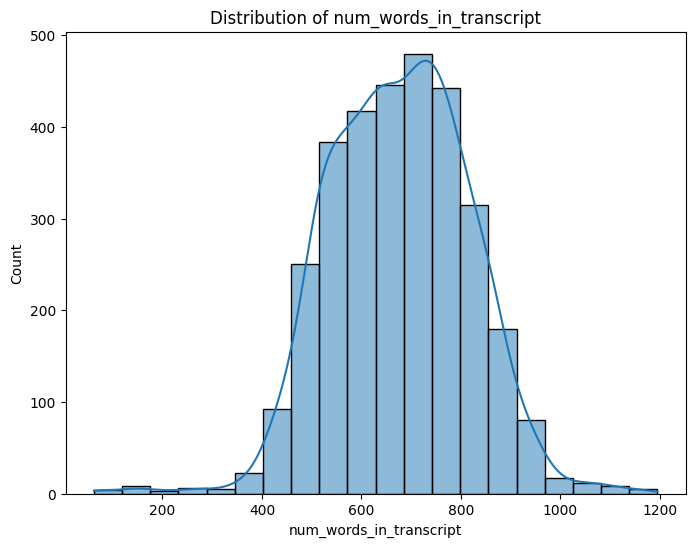

--- Summary of num_words_in_transcript Distribution ---
   - Mean: 676.58
   - Median: 679.00
   - Standard Deviation: 139.51
   - The distribution of num_words_in_transcript is negatively skewed.
   - num_words_in_transcript appears to have a skewed distribution.
   ----------------------------------------------------



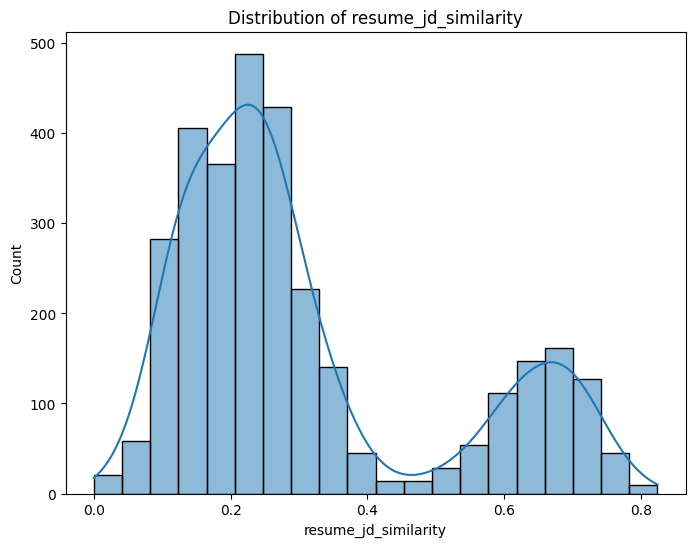

--- Summary of resume_jd_similarity Distribution ---
   - Mean: 0.31
   - Median: 0.24
   - Standard Deviation: 0.20
   - The distribution of resume_jd_similarity is positively skewed.
   - resume_jd_similarity appears to have a normal distribution.
   ----------------------------------------------------



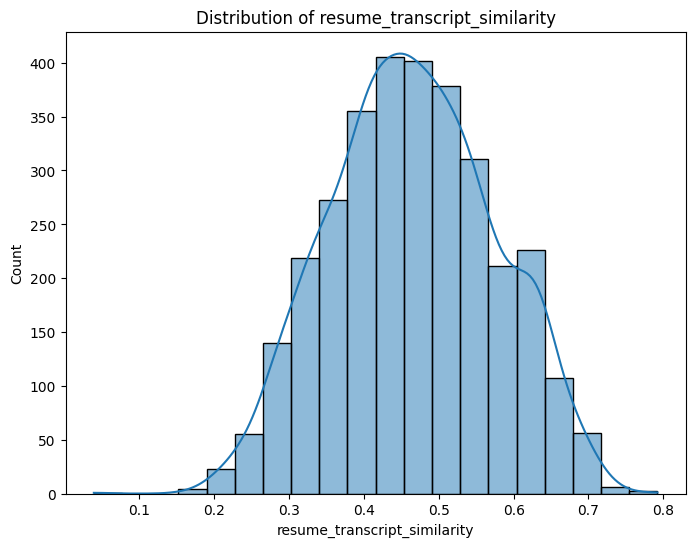

--- Summary of resume_transcript_similarity Distribution ---
   - Mean: 0.47
   - Median: 0.46
   - Standard Deviation: 0.11
   - The distribution of resume_transcript_similarity is positively skewed.
   - resume_transcript_similarity appears to have a normal distribution.
   ----------------------------------------------------



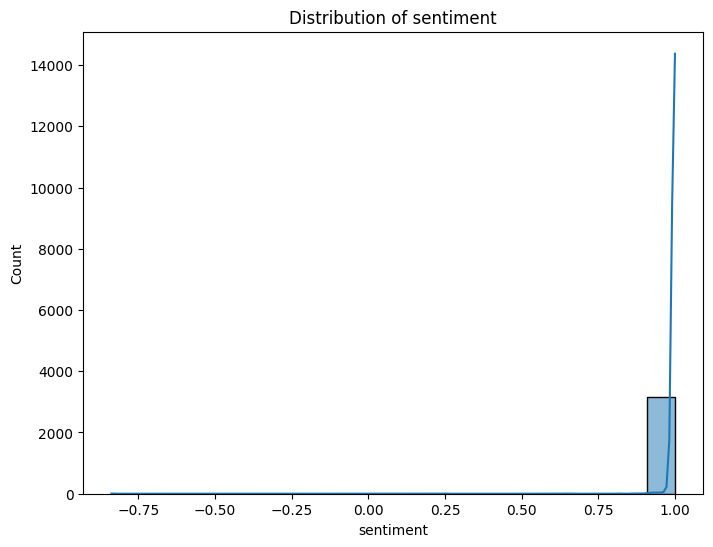

--- Summary of sentiment Distribution ---
   - Mean: 1.00
   - Median: 1.00
   - Standard Deviation: 0.04
   - The distribution of sentiment is negatively skewed.
   - sentiment appears to have a normal distribution.
   ----------------------------------------------------



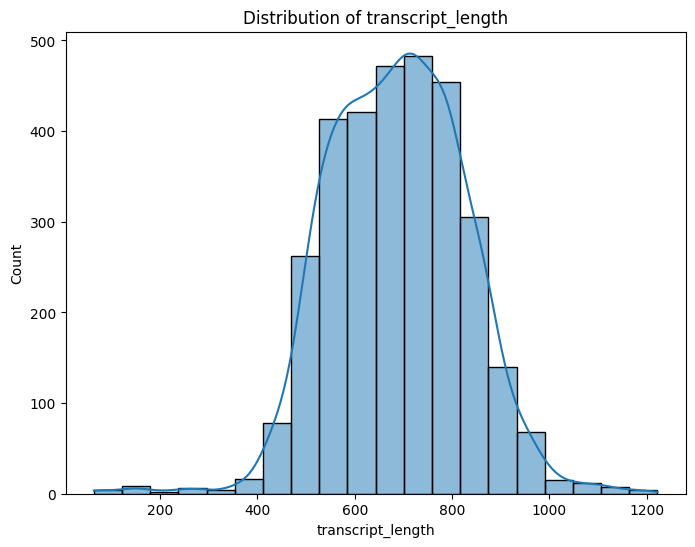

--- Summary of transcript_length Distribution ---
   - Mean: 687.27
   - Median: 688.00
   - Standard Deviation: 138.39
   - The distribution of transcript_length is negatively skewed.
   - transcript_length appears to have a skewed distribution.
   ----------------------------------------------------



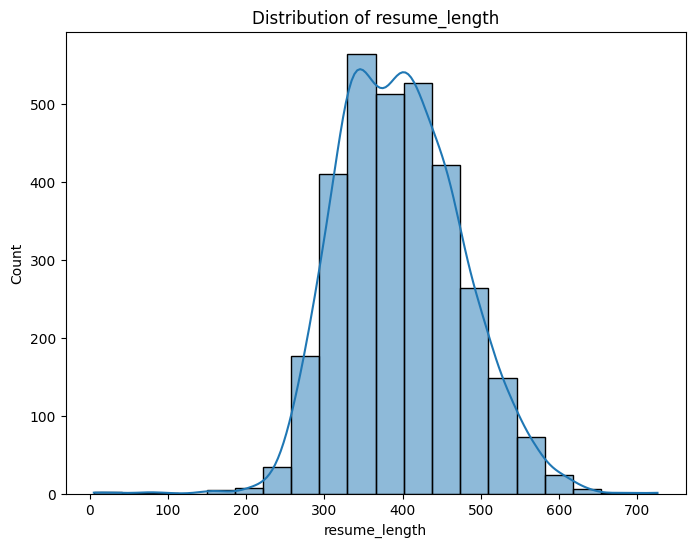

--- Summary of resume_length Distribution ---
   - Mean: 396.74
   - Median: 393.00
   - Standard Deviation: 77.06
   - The distribution of resume_length is positively skewed.
   - resume_length appears to have a skewed distribution.
   ----------------------------------------------------



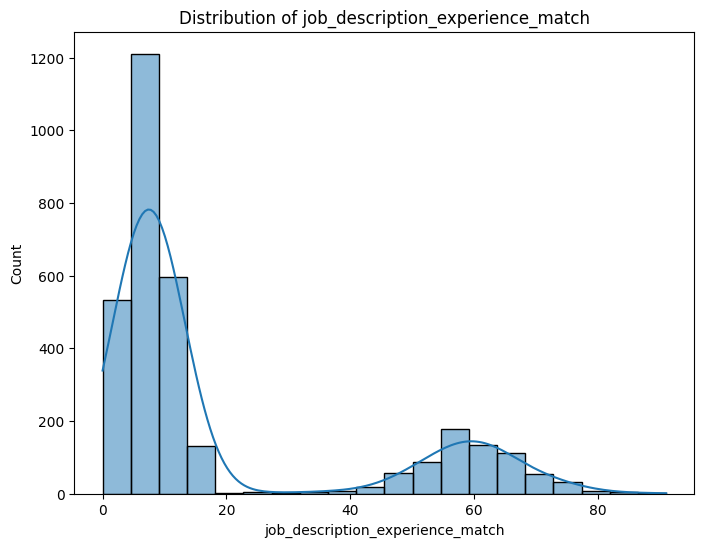

--- Summary of job_description_experience_match Distribution ---
   - Mean: 18.94
   - Median: 9.00
   - Standard Deviation: 22.12
   - The distribution of job_description_experience_match is positively skewed.
   - job_description_experience_match appears to have a skewed distribution.
   ----------------------------------------------------



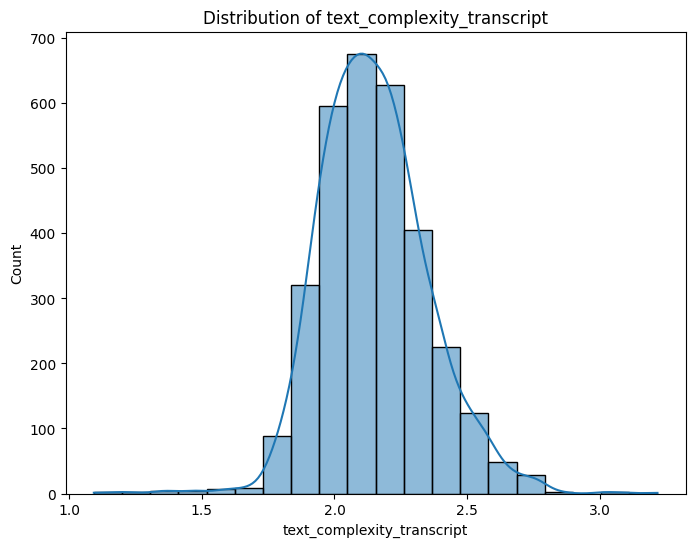

--- Summary of text_complexity_transcript Distribution ---
   - Mean: 2.15
   - Median: 2.13
   - Standard Deviation: 0.20
   - The distribution of text_complexity_transcript is positively skewed.
   - text_complexity_transcript appears to have a normal distribution.
   ----------------------------------------------------



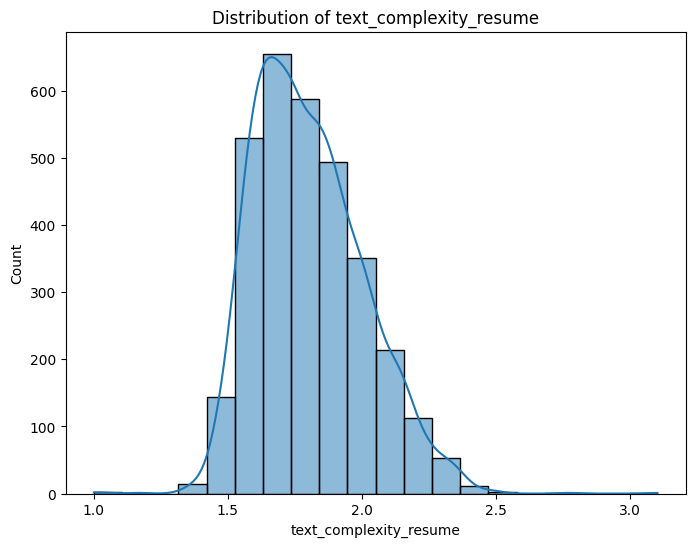

--- Summary of text_complexity_resume Distribution ---
   - Mean: 1.80
   - Median: 1.77
   - Standard Deviation: 0.20
   - The distribution of text_complexity_resume is positively skewed.
   - text_complexity_resume appears to have a normal distribution.
   ----------------------------------------------------



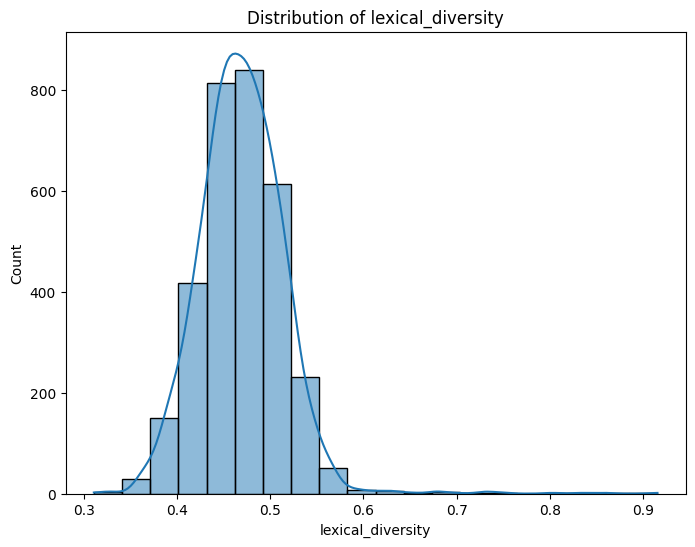

--- Summary of lexical_diversity Distribution ---
   - Mean: 0.47
   - Median: 0.47
   - Standard Deviation: 0.05
   - The distribution of lexical_diversity is positively skewed.
   - lexical_diversity appears to have a normal distribution.
   ----------------------------------------------------



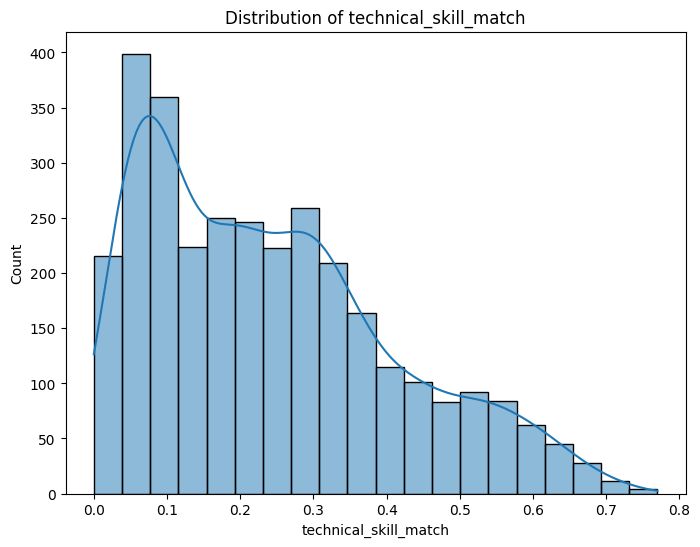

--- Summary of technical_skill_match Distribution ---
   - Mean: 0.24
   - Median: 0.21
   - Standard Deviation: 0.17
   - The distribution of technical_skill_match is positively skewed.
   - technical_skill_match appears to have a normal distribution.
   ----------------------------------------------------



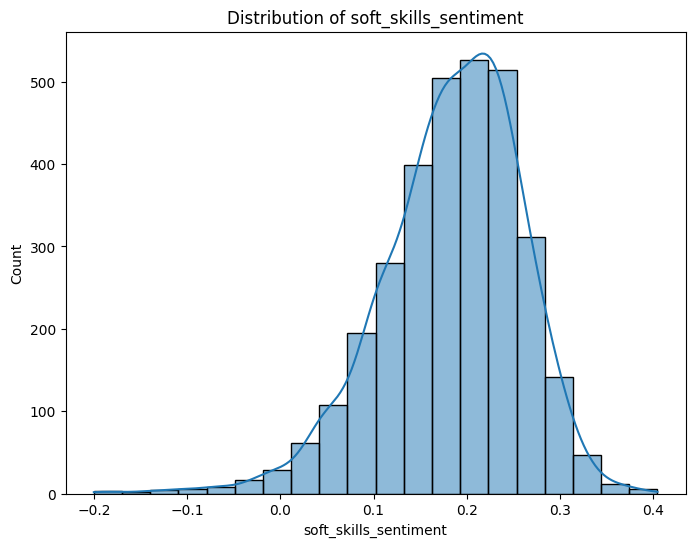

--- Summary of soft_skills_sentiment Distribution ---
   - Mean: 0.18
   - Median: 0.19
   - Standard Deviation: 0.08
   - The distribution of soft_skills_sentiment is negatively skewed.
   - soft_skills_sentiment appears to have a normal distribution.
   ----------------------------------------------------



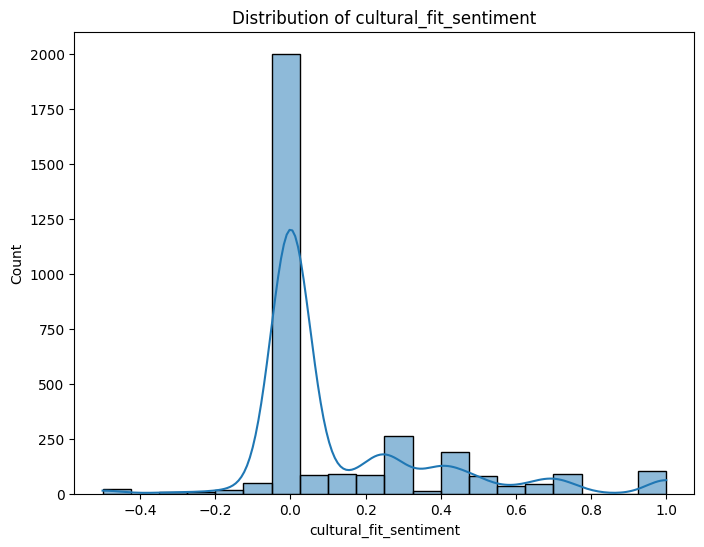

--- Summary of cultural_fit_sentiment Distribution ---
   - Mean: 0.13
   - Median: 0.00
   - Standard Deviation: 0.26
   - The distribution of cultural_fit_sentiment is positively skewed.
   - cultural_fit_sentiment appears to have a skewed distribution.
   ----------------------------------------------------



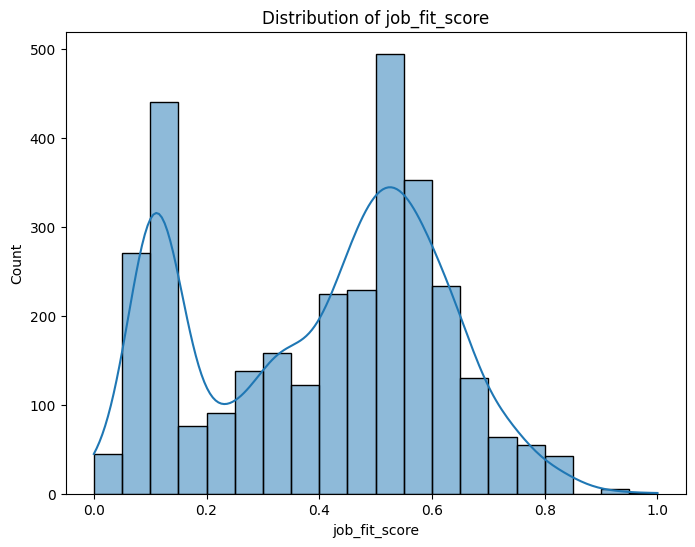

--- Summary of job_fit_score Distribution ---
   - Mean: 0.40
   - Median: 0.45
   - Standard Deviation: 0.21
   - The distribution of job_fit_score is negatively skewed.
   - job_fit_score appears to have a normal distribution.
   ----------------------------------------------------



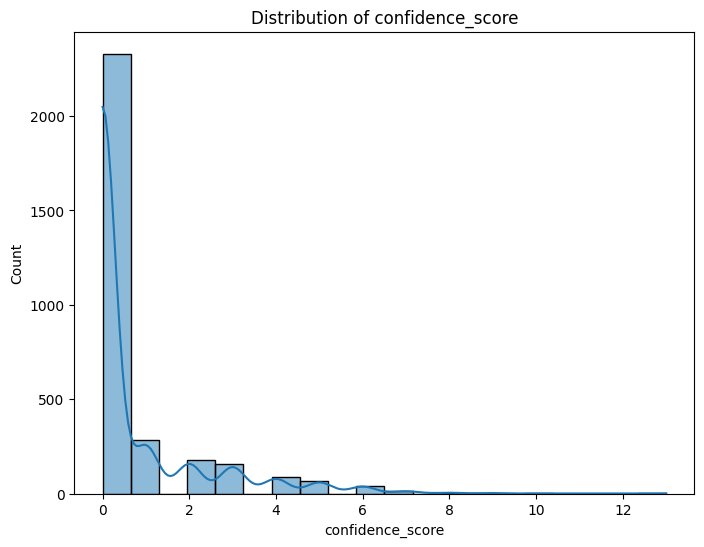

--- Summary of confidence_score Distribution ---
   - Mean: 0.71
   - Median: 0.00
   - Standard Deviation: 1.48
   - The distribution of confidence_score is positively skewed.
   - confidence_score appears to have a skewed distribution.
   ----------------------------------------------------



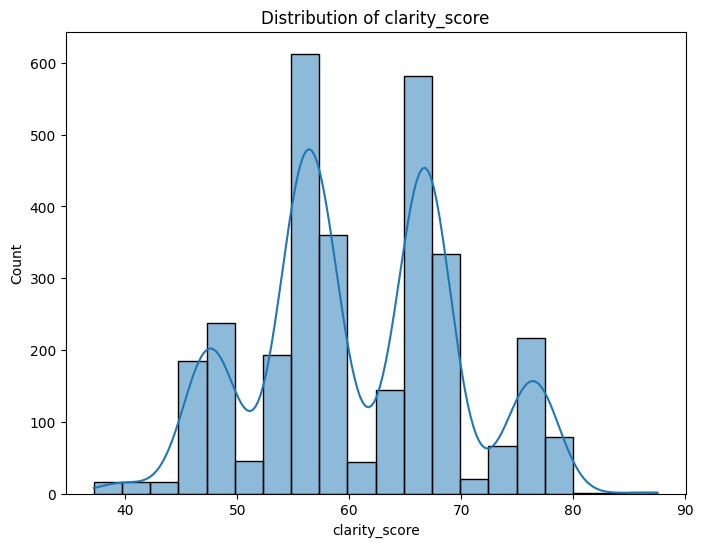

--- Summary of clarity_score Distribution ---
   - Mean: 60.76
   - Median: 58.69
   - Standard Deviation: 8.96
   - The distribution of clarity_score is positively skewed.
   - clarity_score appears to have a skewed distribution.
   ----------------------------------------------------



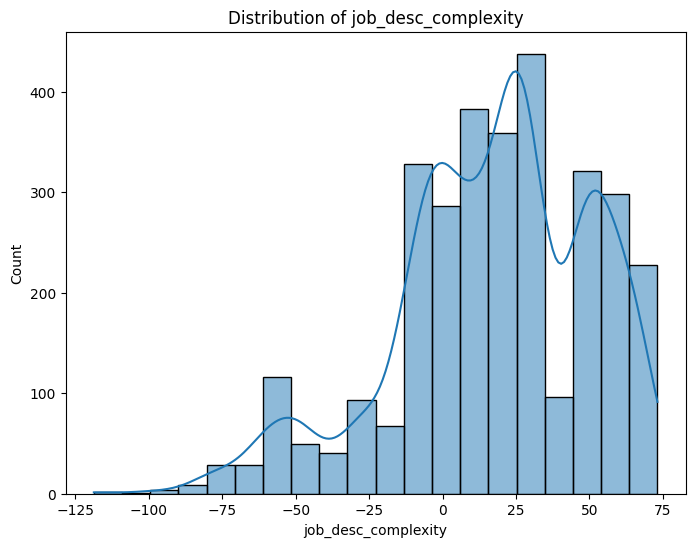

--- Summary of job_desc_complexity Distribution ---
   - Mean: 16.79
   - Median: 22.11
   - Standard Deviation: 33.63
   - The distribution of job_desc_complexity is negatively skewed.
   - job_desc_complexity appears to have a skewed distribution.
   ----------------------------------------------------



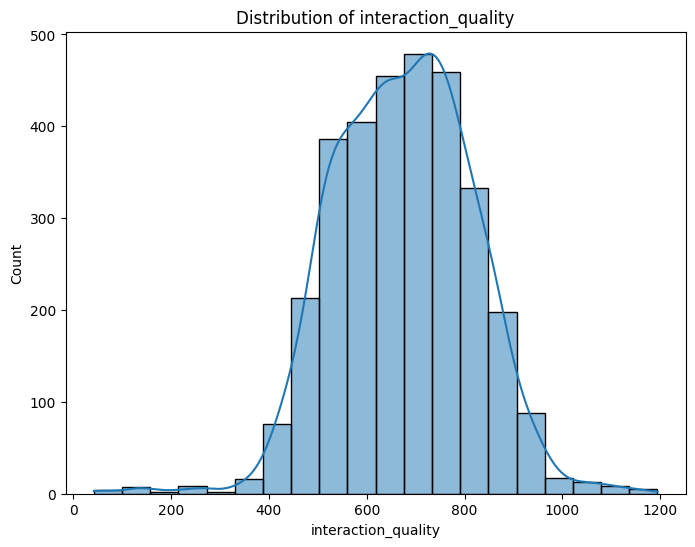

--- Summary of interaction_quality Distribution ---
   - Mean: 674.90
   - Median: 677.39
   - Standard Deviation: 140.46
   - The distribution of interaction_quality is negatively skewed.
   - interaction_quality appears to have a skewed distribution.
   ----------------------------------------------------



In [121]:
# List of numerical features to analyze
numerical_features = ['num_words_in_transcript',
       'resume_jd_similarity', 'resume_transcript_similarity', 'sentiment',
       'transcript_length', 'resume_length',
       'job_description_experience_match', 'text_complexity_transcript',
       'text_complexity_resume', 'lexical_diversity',
       'technical_skill_match', 'soft_skills_sentiment',
       'cultural_fit_sentiment', 'job_fit_score', 'confidence_score',
       'clarity_score', 'job_desc_complexity', 'interaction_quality']

# Loop through each feature and plot its distribution
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True, bins=20)  # Create histogram with KDE curve
    plt.title(f'Distribution of {feature}')
    plt.show()
    
    # Summary of the plot
    print(f"--- Summary of {feature} Distribution ---")
    # Analyze the feature's distribution
    feature_data = data[feature]
    mean_value = feature_data.mean()
    median_value = feature_data.median()
    std_value = feature_data.std()
    
    print(f"   - Mean: {mean_value:.2f}")
    print(f"   - Median: {median_value:.2f}")
    print(f"   - Standard Deviation: {std_value:.2f}")
    
    # Insights based on distribution (adjust based on the feature type)
    if mean_value > median_value:
        print(f"   - The distribution of {feature} is positively skewed.")
    elif mean_value < median_value:
        print(f"   - The distribution of {feature} is negatively skewed.")
    else:
        print(f"   - The distribution of {feature} is symmetric.")
    
    print(f"   - {feature} appears to have a {'normal' if abs(mean_value - median_value) < 0.1 else 'skewed'} distribution.")
    print("   ----------------------------------------------------\n")


In [28]:
#Select features for model training (removed the removed features)
X = data[[
    'num_words_in_transcript',
    'resume_jd_similarity', 'resume_transcript_similarity', 'sentiment',
    'transcript_length', 'resume_length',
    'job_description_experience_match', 'text_complexity_transcript',
    'text_complexity_resume', 'lexical_diversity', 
    'technical_skill_match', 'soft_skills_sentiment',
    'cultural_fit_sentiment', 'job_fit_score', 'confidence_score',
    'clarity_score', 'job_desc_complexity', 'interaction_quality'
]]

y = data['decision']

In [29]:
##Train a RandomForestClassifier (or any other model you prefer)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 87.87%


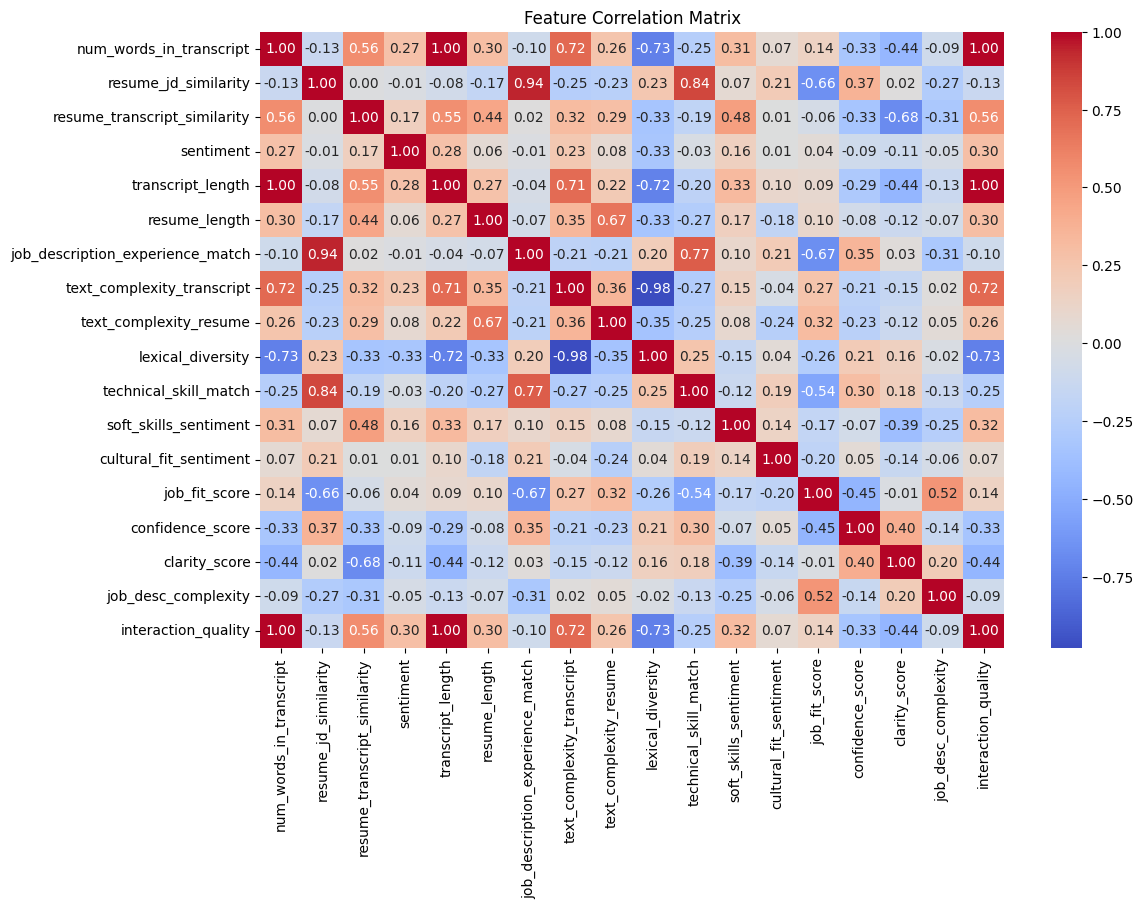


--- Feature Correlation Insights ---
   - Maximum correlation: 1.00 between ('num_words_in_transcript', 'num_words_in_transcript')
   - Minimum correlation: -0.98 between ('text_complexity_transcript', 'lexical_diversity')
   - Mean correlation across all features: 0.08
   - Positive correlations suggest a strong relationship, while negative correlations indicate inverse relationships.


In [122]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

# Summary of the correlations
print("\n--- Feature Correlation Insights ---")

# Get the highest and lowest correlation values
max_corr = corr_matrix.max().max()  # Maximum correlation
min_corr = corr_matrix.min().min()  # Minimum correlation
mean_corr = corr_matrix.mean().mean()  # Mean correlation

# Identify highly correlated feature pairs
max_corr_pair = corr_matrix.stack().idxmax()  # Pair with the highest correlation
min_corr_pair = corr_matrix.stack().idxmin()  # Pair with the lowest correlation

# Print the summary
print(f"   - Maximum correlation: {max_corr:.2f} between {max_corr_pair}")
print(f"   - Minimum correlation: {min_corr:.2f} between {min_corr_pair}")
print(f"   - Mean correlation across all features: {mean_corr:.2f}")
print(f"   - Positive correlations suggest a strong relationship, while negative correlations indicate inverse relationships.")

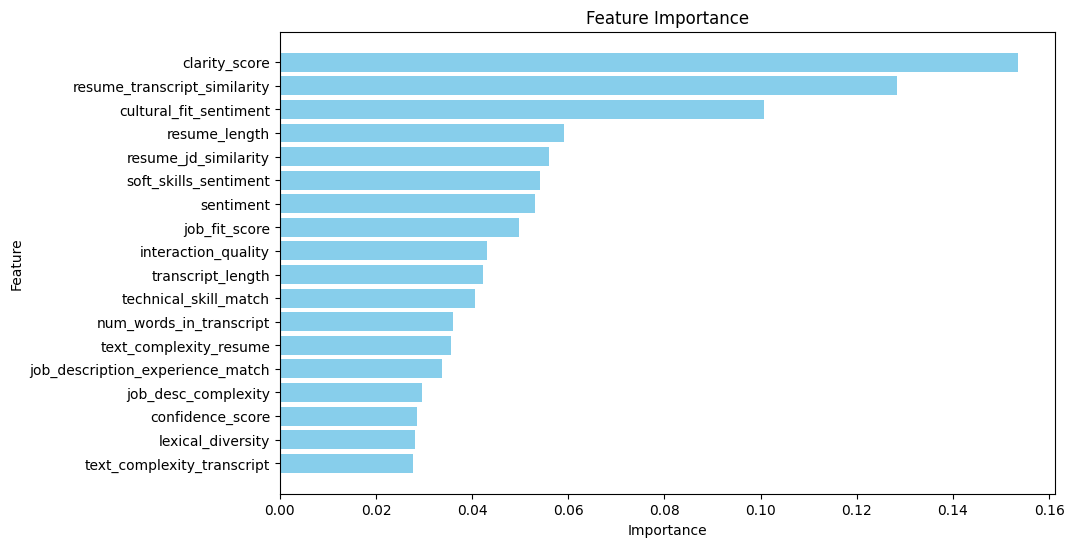


--- Feature Importance Summary ---
Top 5 most important features:
                         Feature  Importance
15                 clarity_score    0.153508
2   resume_transcript_similarity    0.128326
12        cultural_fit_sentiment    0.100725
5                  resume_length    0.059216
1           resume_jd_similarity    0.055907

Bottom 5 least important features:
                             Feature  Importance
6   job_description_experience_match    0.033836
16               job_desc_complexity    0.029674
14                  confidence_score    0.028443
9                  lexical_diversity    0.028192
7         text_complexity_transcript    0.027702

Average feature importance: 0.06
Features with higher importance have a stronger influence on the model's predictions, and may be prioritized for further analysis or tuning.


In [123]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show highest importance at the top
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Summary of the plot
# Display the top 5 most and least important features
print("\n--- Feature Importance Summary ---")
top_5_features = feature_importances.head(5)
bottom_5_features = feature_importances.tail(5)

print("Top 5 most important features:")
print(top_5_features[['Feature', 'Importance']])

print("\nBottom 5 least important features:")
print(bottom_5_features[['Feature', 'Importance']])

# Overall description
average_importance = feature_importances['Importance'].mean()
print(f"\nAverage feature importance: {average_importance:.2f}")
print("Features with higher importance have a stronger influence on the model's predictions, and may be prioritized for further analysis or tuning.")

In [146]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc

# Hyperparameter tuning: Try different values for regularization strength (C)
param_grid = {'C': [0.1, 0.5, 1, 5, 10]}  # Inverse of regularization strength
log_reg = LogisticRegression(solver='liblinear')

# Use GridSearchCV to find the best regularization parameter C
grid_search = GridSearchCV(log_reg, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Best hyperparameter and model
best_C = grid_search.best_params_['C']
best_log_reg_model = grid_search.best_estimator_

# Predict on test set
y_pred_prob = best_log_reg_model.predict_proba(X_test)[:, 1]
y_pred_binary = best_log_reg_model.predict(X_test)

# Calculate accuracy and ROC AUC
log_reg_accuracy = accuracy_score(y_test, y_pred_binary)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
log_reg_roc_auc = auc(fpr, tpr)

# Output the best model's parameters and performance
print(f"Best Logistic Regression Accuracy: {log_reg_accuracy*100:.4f}")
print(f"Best Logistic Regression AUC: {log_reg_roc_auc:.4f}")

Best Logistic Regression Accuracy: 81.2598
Best Logistic Regression AUC: 0.9028


In [138]:
# --- Error Analysis ---
error_analysis = X_test.copy()
error_analysis['True Label'] = y_test
error_analysis['Predicted Label'] = y_pred_binary
error_analysis['Error'] = error_analysis['True Label'] != error_analysis['Predicted Label']

# Display misclassified samples
misclassified_samples = error_analysis[error_analysis['Error'] == True]
print("Misclassified Instances:")
print(misclassified_samples.head())  # Displaying the first few misclassified instances


Misclassified Instances:
      num_words_in_transcript  resume_jd_similarity  \
1771                      735              0.204282   
1566                      636              0.256930   
3115                      847              0.269972   
654                       504              0.212894   
1551                      539              0.335625   

      resume_transcript_similarity  sentiment  transcript_length  \
1771                      0.369067     0.9972                735   
1566                      0.296303     0.9994                636   
3115                      0.380608     0.9990                847   
654                       0.252388     0.9964                523   
1551                      0.430371     0.9967                539   

      resume_length  job_description_experience_match  \
1771            361                                10   
1566            312                                10   
3115            363                                13   
654    

In [154]:
# Counting the total number of misclassified instances
misclassified_count = len(misclassified_samples)

# Professional phrasing
total_misclassified = f"Total number of misclassified instances: {misclassified_count}"
total_misclassified


'Total number of misclassified instances: 119'

In [143]:
# Fit the logistic regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Now you can calculate the impact as you were doing
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_reg_model.coef_[0],  # Coefficients from the model
    'Impact': abs(log_reg_model.coef_[0]) * X_train.std()  # Impact = coefficient * std deviation
})

# Sorting by impact to see the features with the highest influence
coefficients_sorted = coefficients.sort_values(by='Impact', ascending=False)

# Printing the impact analysis summary
print("Impact Analysis (Logistic Regression):")
print(coefficients_sorted)


Impact Analysis (Logistic Regression):
                                                           Feature  \
transcript_length                                transcript_length   
interaction_quality                            interaction_quality   
confidence_score                                  confidence_score   
num_words_in_transcript                    num_words_in_transcript   
resume_length                                        resume_length   
clarity_score                                        clarity_score   
job_desc_complexity                            job_desc_complexity   
job_description_experience_match  job_description_experience_match   
cultural_fit_sentiment                      cultural_fit_sentiment   
resume_jd_similarity                          resume_jd_similarity   
text_complexity_transcript              text_complexity_transcript   
resume_transcript_similarity          resume_transcript_similarity   
job_fit_score                                      

c:\Users\yalla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


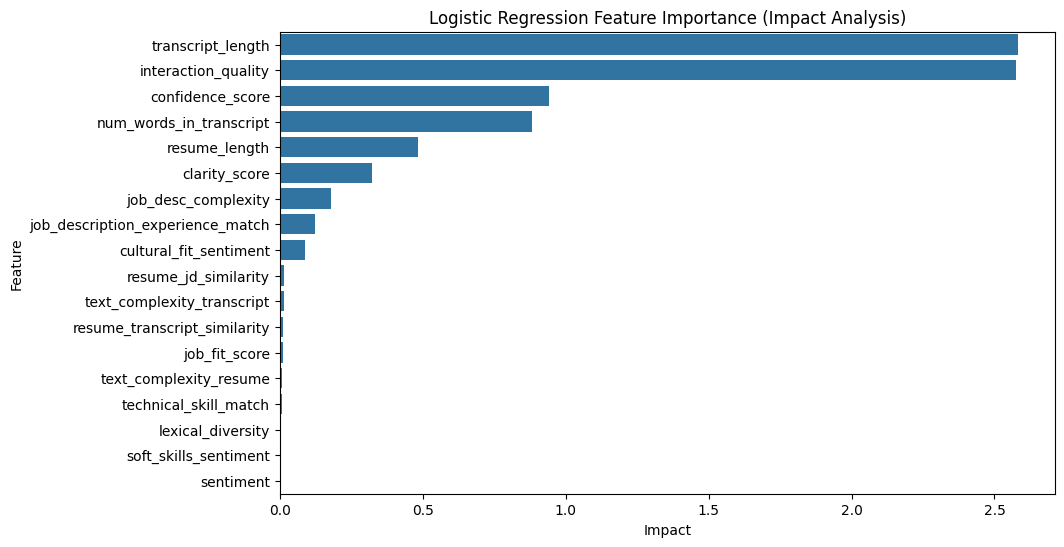

Summary of Feature Importance:
The plot above shows the importance of features in predicting the target variable based on their impact. The impact is calculated as the product of the absolute coefficient and the standard deviation of each feature.

Top 5 most impactful features:
transcript_length: Coefficient = 0.0185, Impact = 2.5819
interaction_quality: Coefficient = -0.0182, Impact = 2.5758
confidence_score: Coefficient = -0.6386, Impact = 0.9426
num_words_in_transcript: Coefficient = 0.0063, Impact = 0.8807
resume_length: Coefficient = -0.0062, Impact = 0.4846


In [148]:
# --- Feature Importance Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Impact', y='Feature', data=coefficients_sorted)
plt.title('Logistic Regression Feature Importance (Impact Analysis)')
plt.show()

# --- Summary ---
top_features = coefficients_sorted.head(5)  # Top 5 features by impact

# Summarizing the plot
print("Summary of Feature Importance:")
print(f"The plot above shows the importance of features in predicting the target variable based on their impact. The impact is calculated as the product of the absolute coefficient and the standard deviation of each feature.")
print("\nTop 5 most impactful features:")
for i, row in top_features.iterrows():
    print(f"{row['Feature']}: Coefficient = {row['Coefficient']:.4f}, Impact = {row['Impact']:.4f}")

In [40]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

# Decision Tree Hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

dt_best = grid_search.best_estimator_
dt_y_pred = dt_best.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_roc_auc = roc_auc_score(y_test, dt_best.predict_proba(X_test)[:, 1])

In [41]:
print(f'Decision Tree Accuracy: {dt_accuracy * 100:.2f}%')
print(f'Decision Tree ROC AUC: {dt_roc_auc:.4f}')


Decision Tree Accuracy: 84.41%
Decision Tree ROC AUC: 0.9110


In [42]:
# Error Analysis
dt_errors = X_test.copy()
dt_errors['True Label'] = y_test
dt_errors['Predicted Label'] = dt_best.predict(X_test)
dt_errors['Error'] = dt_errors['True Label'] != dt_errors['Predicted Label']

# Display a few misclassified instances
misclassified_dt = dt_errors[dt_errors['Error'] == True]
print("Misclassified Instances (Decision Tree):")
print(misclassified_dt.head())




Misclassified Instances (Decision Tree):
      num_words_in_transcript  resume_jd_similarity  \
1655                      648              0.250854   
1771                      735              0.204282   
1850                      636              0.181735   
1551                      539              0.335625   
1874                      606              0.260731   

      resume_transcript_similarity  sentiment  transcript_length  \
1655                      0.397662     0.9947                648   
1771                      0.369067     0.9972                735   
1850                      0.291331     0.9979                636   
1551                      0.430371     0.9967                539   
1874                      0.364661     0.9964                606   

      resume_length  job_description_experience_match  \
1655            337                                10   
1771            361                                10   
1850            325                             

In [152]:
# Counting the total number of misclassified instances
misclassified_count = len(misclassified_dt)

# Professional phrasing
total_misclassified = f"Total number of misclassified instances: {misclassified_count}"
total_misclassified

'Total number of misclassified instances: 99'

In [44]:
# Impact Analysis (using feature importances)
dt_feature_importance = dt_best.feature_importances_
dt_impact_analysis = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_feature_importance
}).sort_values(by='Importance', ascending=False)

# Displaying impact
print("Impact Analysis (Decision Tree):")
print(dt_impact_analysis)


Impact Analysis (Decision Tree):
                             Feature  Importance
15                     clarity_score    0.323774
12            cultural_fit_sentiment    0.176698
2       resume_transcript_similarity    0.108480
13                     job_fit_score    0.068708
14                  confidence_score    0.043919
5                      resume_length    0.043520
16               job_desc_complexity    0.041634
3                          sentiment    0.036416
6   job_description_experience_match    0.033401
17               interaction_quality    0.032504
11             soft_skills_sentiment    0.016622
9                  lexical_diversity    0.016107
4                  transcript_length    0.014571
1               resume_jd_similarity    0.013761
8             text_complexity_resume    0.012427
10             technical_skill_match    0.011687
7         text_complexity_transcript    0.004067
0            num_words_in_transcript    0.001702


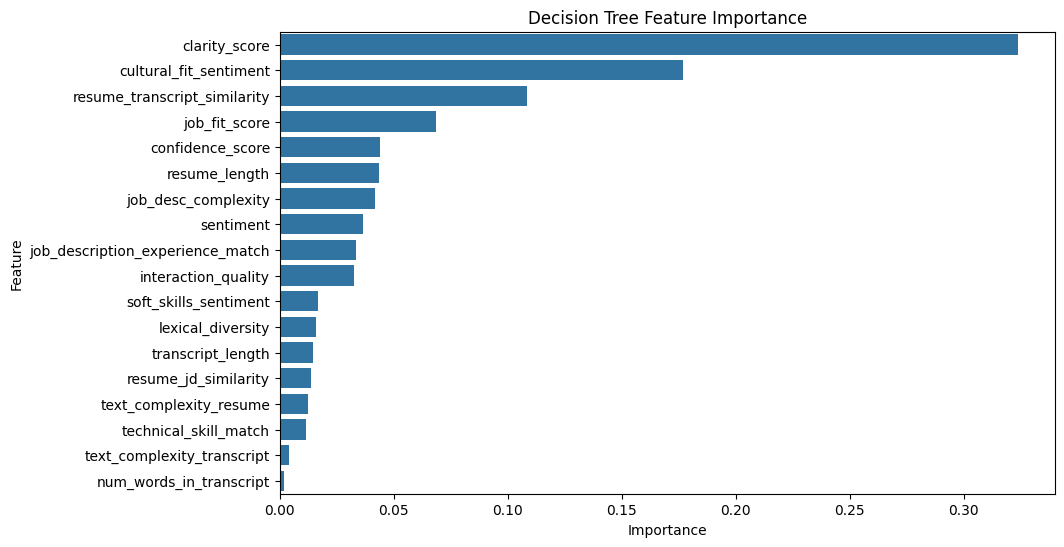

Summary of Feature Importance (Decision Tree):
The plot above shows the feature importance in the Decision Tree model. Features with higher importance have a stronger influence on the model's predictions.

Top 5 most impactful features:
clarity_score: Importance = 0.3238
cultural_fit_sentiment: Importance = 0.1767
resume_transcript_similarity: Importance = 0.1085
job_fit_score: Importance = 0.0687
confidence_score: Importance = 0.0439


In [170]:
# --- Decision Tree Feature Importance Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dt_impact_analysis)
plt.title('Decision Tree Feature Importance')
plt.show()

# --- Summary ---
top_dt_features = dt_impact_analysis.head(5)  # Top 5 features by importance

# Summarizing the plot
print("Summary of Feature Importance (Decision Tree):")
print(f"The plot above shows the feature importance in the Decision Tree model. Features with higher importance have a stronger influence on the model's predictions.")
print("\nTop 5 most impactful features:")
for i, row in top_dt_features.iterrows():
    print(f"{row['Feature']}: Importance = {row['Importance']:.4f}")


In [46]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

# Random Forest Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

rf_best = grid_search.best_estimator_
rf_y_pred = rf_best.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_roc_auc = roc_auc_score(y_test, rf_best.predict_proba(X_test)[:, 1])

In [155]:
print(f'Random Forest Accuracy: {rf_accuracy * 100:.2f}%')
print(f'Random Forest ROC AUC: {rf_roc_auc:.4f}')

Random Forest Accuracy: 87.40%
Random Forest ROC AUC: 0.9656


In [49]:
# Error Analysis
rf_errors = X_test.copy()
rf_errors['True Label'] = y_test
rf_errors['Predicted Label'] = rf_best.predict(X_test)
rf_errors['Error'] = rf_errors['True Label'] != rf_errors['Predicted Label']

# Display a few misclassified instances
misclassified_rf = rf_errors[rf_errors['Error'] == True]
print("Misclassified Instances (Random Forest):")
print(misclassified_rf.head())


Misclassified Instances (Random Forest):
      num_words_in_transcript  resume_jd_similarity  \
1655                      648              0.250854   
1566                      636              0.256930   
2749                      700              0.168350   
1551                      539              0.335625   
1741                      607              0.207765   

      resume_transcript_similarity  sentiment  transcript_length  \
1655                      0.397662     0.9947                648   
1566                      0.296303     0.9994                636   
2749                      0.616727     0.9991                700   
1551                      0.430371     0.9967                539   
1741                      0.362281     0.9977                607   

      resume_length  job_description_experience_match  \
1655            337                                10   
1566            312                                10   
2749            488                             

In [157]:
# Counting the total number of misclassified instances
misclassified_count = len(misclassified_rf)

# Professional phrasing
total_misclassified = f'Total number of misclassified instances: {misclassified_count}'
total_misclassified


'Total number of misclassified instances: 80'

In [51]:
# Impact Analysis (using feature importances)
rf_feature_importance = rf_best.feature_importances_
rf_impact_analysis = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_feature_importance
}).sort_values(by='Importance', ascending=False)

# Displaying impact
print("Impact Analysis (Random Forest):")
print(rf_impact_analysis)


Impact Analysis (Random Forest):
                             Feature  Importance
2       resume_transcript_similarity    0.149669
15                     clarity_score    0.146337
12            cultural_fit_sentiment    0.108933
3                          sentiment    0.069645
5                      resume_length    0.064339
1               resume_jd_similarity    0.060493
11             soft_skills_sentiment    0.050668
13                     job_fit_score    0.042062
10             technical_skill_match    0.040778
17               interaction_quality    0.040260
0            num_words_in_transcript    0.038525
4                  transcript_length    0.037947
6   job_description_experience_match    0.031286
14                  confidence_score    0.026721
16               job_desc_complexity    0.026361
7         text_complexity_transcript    0.022476
9                  lexical_diversity    0.022473
8             text_complexity_resume    0.021025


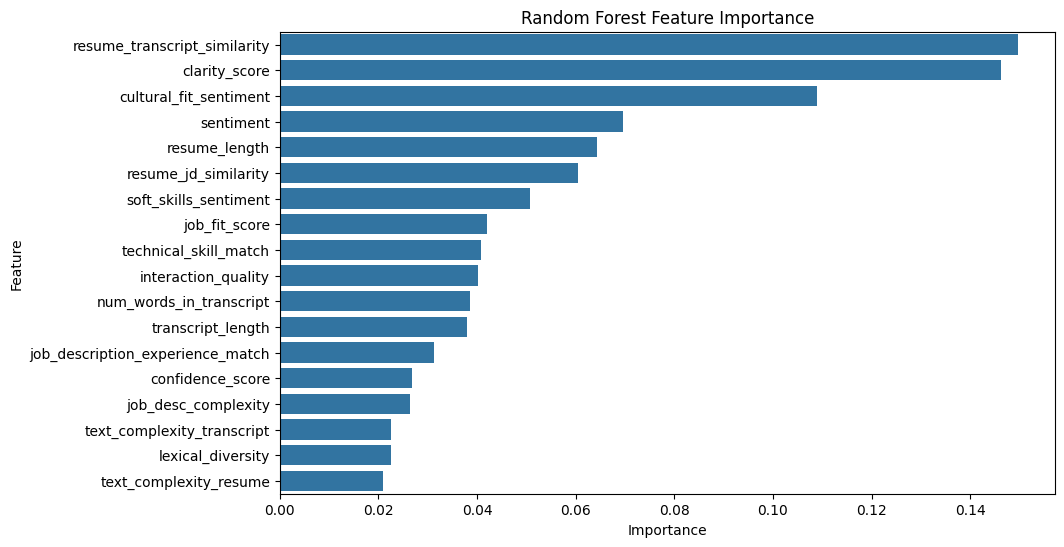

Summary of Feature Importance (Random Forest):
The plot above shows the feature importance in the Random Forest model. Features with higher importance have a stronger influence on the model's predictions.

Top 5 most impactful features:
resume_transcript_similarity: Importance = 0.1497
clarity_score: Importance = 0.1463
cultural_fit_sentiment: Importance = 0.1089
sentiment: Importance = 0.0696
resume_length: Importance = 0.0643


In [172]:
# --- Random Forest Feature Importance Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_impact_analysis)
plt.title('Random Forest Feature Importance')
plt.show()

# --- Summary ---
top_rf_features = rf_impact_analysis.head(5)  # Top 5 features by importance

# Summarizing the plot
print("Summary of Feature Importance (Random Forest):")
print(f"The plot above shows the feature importance in the Random Forest model. Features with higher importance have a stronger influence on the model's predictions.")
print("\nTop 5 most impactful features:")
for i, row in top_rf_features.iterrows():
    print(f"{row['Feature']}: Importance = {row['Importance']:.4f}")


In [53]:
##XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

# XGBoost Hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 150]
}

xgb = XGBClassifier(random_state=42)
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

xgb_best = grid_search.best_estimator_
xgb_y_pred = xgb_best.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_roc_auc = roc_auc_score(y_test, xgb_best.predict_proba(X_test)[:, 1])

In [158]:
print(f'XGBoost Accuracy: {xgb_accuracy * 100:.2f}%')
print(f'XGBoost ROC AUC: {xgb_roc_auc:.4f}')

XGBoost Accuracy: 87.72%
XGBoost ROC AUC: 0.9675


In [56]:
# Error Analysis
xgb_errors = X_test.copy()
xgb_errors['True Label'] = y_test
xgb_errors['Predicted Label'] = xgb_best.predict(X_test)
xgb_errors['Error'] = xgb_errors['True Label'] != xgb_errors['Predicted Label']

# Display a few misclassified instances
misclassified_xgb = xgb_errors[xgb_errors['Error'] == True]
print("Misclassified Instances (XGBoost):")
print(misclassified_xgb.head())


Misclassified Instances (XGBoost):
      num_words_in_transcript  resume_jd_similarity  \
1655                      648              0.250854   
1771                      735              0.204282   
1566                      636              0.256930   
1551                      539              0.335625   
1741                      607              0.207765   

      resume_transcript_similarity  sentiment  transcript_length  \
1655                      0.397662     0.9947                648   
1771                      0.369067     0.9972                735   
1566                      0.296303     0.9994                636   
1551                      0.430371     0.9967                539   
1741                      0.362281     0.9977                607   

      resume_length  job_description_experience_match  \
1655            337                                10   
1771            361                                10   
1566            312                                10 

In [160]:
# Counting the total number of misclassified instances
misclassified_count = len(misclassified_xgb)

# Professional phrasing
total_misclassified = f"Total number of misclassified instances: {misclassified_count}"
total_misclassified


'Total number of misclassified instances: 78'

In [58]:
# Impact Analysis (using feature importances)
xgb_feature_importance = xgb_best.get_booster().get_score(importance_type='weight')
xgb_impact_analysis = pd.DataFrame(list(xgb_feature_importance.items()), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)

# Displaying impact
print("Impact Analysis (XGBoost):")
print(xgb_impact_analysis)


Impact Analysis (XGBoost):
                             Feature  Importance
12            cultural_fit_sentiment       132.0
13                     job_fit_score        81.0
2       resume_transcript_similarity        80.0
5                      resume_length        61.0
15                     clarity_score        59.0
11             soft_skills_sentiment        57.0
10             technical_skill_match        52.0
1               resume_jd_similarity        47.0
4                  transcript_length        35.0
14                  confidence_score        33.0
7         text_complexity_transcript        31.0
6   job_description_experience_match        30.0
16               job_desc_complexity        29.0
17               interaction_quality        28.0
0            num_words_in_transcript        27.0
3                          sentiment        25.0
8             text_complexity_resume        22.0
9                  lexical_diversity        11.0


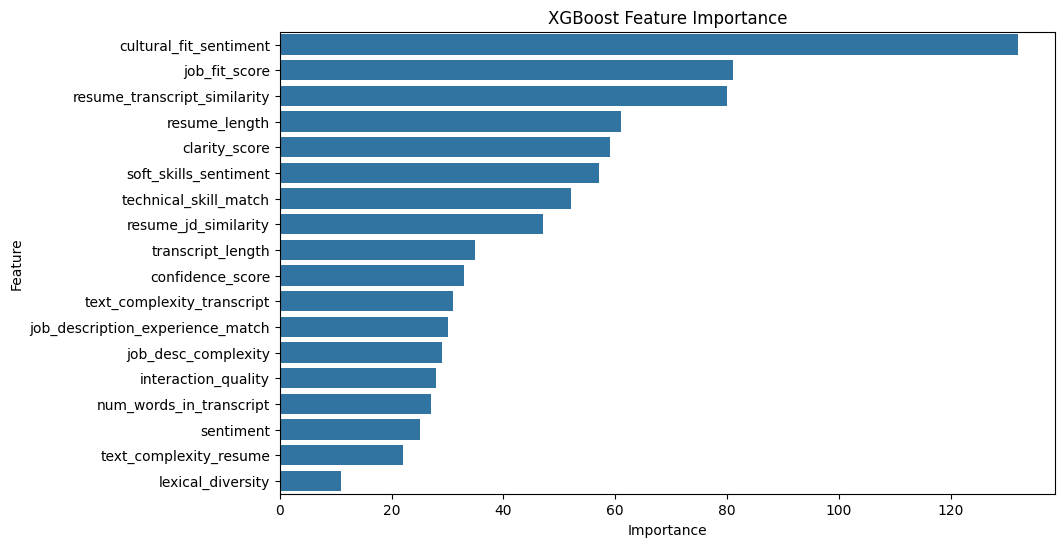

Summary of Feature Importance (XGBoost):
The plot above shows the feature importance in the XGBoost model. Features with higher importance have a stronger influence on the model's predictions.

Top 5 most impactful features:
cultural_fit_sentiment: Importance = 132.0000
job_fit_score: Importance = 81.0000
resume_transcript_similarity: Importance = 80.0000
resume_length: Importance = 61.0000
clarity_score: Importance = 59.0000


In [173]:
# --- XGBoost Feature Importance Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_impact_analysis)
plt.title('XGBoost Feature Importance')
plt.show()

# --- Summary ---
top_xgb_features = xgb_impact_analysis.head(5)  # Top 5 features by importance

# Summarizing the plot
print("Summary of Feature Importance (XGBoost):")
print(f"The plot above shows the feature importance in the XGBoost model. Features with higher importance have a stronger influence on the model's predictions.")
print("\nTop 5 most impactful features:")
for i, row in top_xgb_features.iterrows():
    print(f"{row['Feature']}: Importance = {row['Importance']:.4f}")


In [60]:
#Support Vector Machine (SVM)
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm = SVC(probability=True, random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

svm_best = grid_search.best_estimator_
svm_y_pred = svm_best.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_roc_auc = roc_auc_score(y_test, svm_best.predict_proba(X_test)[:, 1])

In [61]:
print(f'SVM Accuracy: {svm_accuracy * 100:.2f}%')
print(f'SVM ROC AUC: {svm_roc_auc:.4f}')

SVM Accuracy: 82.20%
SVM ROC AUC: 0.9017


In [62]:
# Error Analysis
svm_errors = X_test.copy()
svm_errors['True Label'] = y_test
svm_errors['Predicted Label'] = svm_best.predict(X_test)
svm_errors['Error'] = svm_errors['True Label'] != svm_errors['Predicted Label']

# Display a few misclassified instances
misclassified_svm = svm_errors[svm_errors['Error'] == True]
print("Misclassified Instances (SVM):")
print(misclassified_svm.head())


Misclassified Instances (SVM):
      num_words_in_transcript  resume_jd_similarity  \
1771                      735              0.204282   
1566                      636              0.256930   
3115                      847              0.269972   
654                       504              0.212894   
2226                      874              0.155249   

      resume_transcript_similarity  sentiment  transcript_length  \
1771                      0.369067     0.9972                735   
1566                      0.296303     0.9994                636   
3115                      0.380608     0.9990                847   
654                       0.252388     0.9964                523   
2226                      0.528370     0.9989                874   

      resume_length  job_description_experience_match  \
1771            361                                10   
1566            312                                10   
3115            363                                13   
6

In [161]:
# Counting the total number of misclassified instances
misclassified_count = len(misclassified_svm)

# Professional phrasing
total_misclassified = f"Total number of misclassified instances: {misclassified_count}"
total_misclassified


'Total number of misclassified instances: 113'

In [64]:
# Impact Analysis (using coefficients for linear kernel)
svm_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': svm_best.coef_[0],
    'Impact': svm_best.coef_[0] * X_train.std()
}).sort_values(by='Impact', ascending=False)

# Displaying impact
print("Impact Analysis (SVM):")
print(svm_coefficients)


Impact Analysis (SVM):
                                                           Feature  \
num_words_in_transcript                    num_words_in_transcript   
cultural_fit_sentiment                      cultural_fit_sentiment   
resume_jd_similarity                          resume_jd_similarity   
resume_transcript_similarity          resume_transcript_similarity   
soft_skills_sentiment                        soft_skills_sentiment   
lexical_diversity                                lexical_diversity   
technical_skill_match                        technical_skill_match   
sentiment                                                sentiment   
job_desc_complexity                            job_desc_complexity   
text_complexity_resume                      text_complexity_resume   
job_fit_score                                        job_fit_score   
resume_length                                        resume_length   
clarity_score                                        clarity_score 

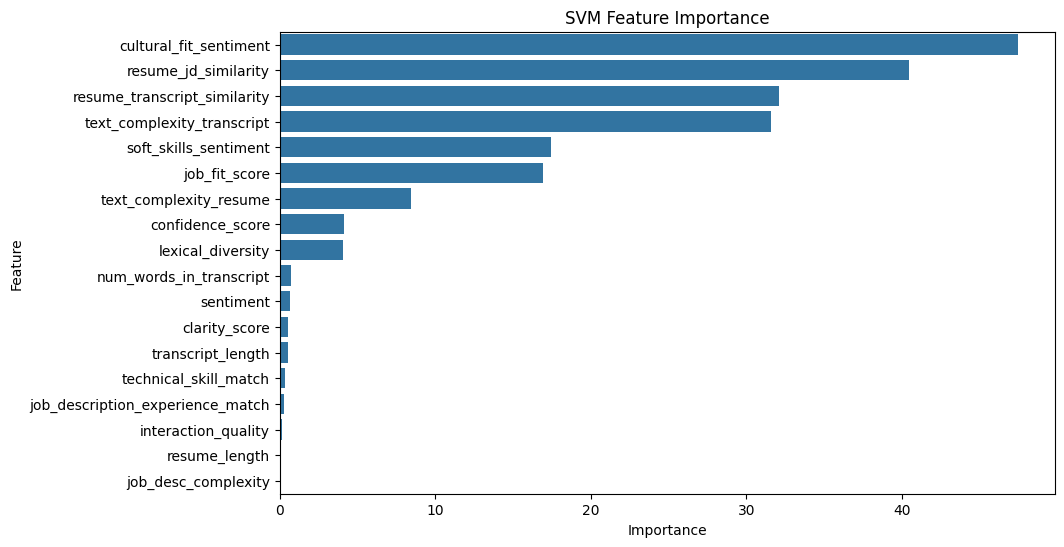

Summary of Feature Importance (SVM):
The plot above shows the feature importance in the SVM model (with linear kernel). Features with higher importance have a stronger influence on the model's predictions.

Top 5 most impactful features:
cultural_fit_sentiment: Importance = 47.4592
resume_jd_similarity: Importance = 40.4791
resume_transcript_similarity: Importance = 32.0962
text_complexity_transcript: Importance = 31.5613
soft_skills_sentiment: Importance = 17.4581


In [175]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=svm_feature_importance_df)
plt.title('SVM Feature Importance')
plt.show()

# --- Summary ---
top_svm_features = svm_feature_importance_df.head(5)  # Top 5 features by importance

# Summarizing the plot
print("Summary of Feature Importance (SVM):")
print(f"The plot above shows the feature importance in the SVM model (with linear kernel). Features with higher importance have a stronger influence on the model's predictions.")
print("\nTop 5 most impactful features:")
for i, row in top_svm_features.iterrows():
    print(f"{row['Feature']}: Importance = {row['Importance']:.4f}")


In [66]:
#Gradient Boosting 

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

# Gradient Boosting Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7]
}

gb = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

gb_best = grid_search.best_estimator_
gb_y_pred = gb_best.predict(X_test)

gb_accuracy = accuracy_score(y_test, gb_y_pred)
gb_roc_auc = roc_auc_score(y_test, gb_best.predict_proba(X_test)[:, 1])

In [67]:
print(f'Gradient Boosting Accuracy: {gb_accuracy * 100:.2f}%')
print(f'Gradient Boosting ROC AUC: {gb_roc_auc:.4f}')

Gradient Boosting Accuracy: 87.24%
Gradient Boosting ROC AUC: 0.9660


In [68]:
# Error Analysis
gb_errors = X_test.copy()
gb_errors['True Label'] = y_test
gb_errors['Predicted Label'] = gb_best.predict(X_test)
gb_errors['Error'] = gb_errors['True Label'] != gb_errors['Predicted Label']

# Display a few misclassified instances
misclassified_gb = gb_errors[gb_errors['Error'] == True]
print("Misclassified Instances (Gradient Boosting):")
print(misclassified_gb.head())


Misclassified Instances (Gradient Boosting):
      num_words_in_transcript  resume_jd_similarity  \
1655                      648              0.250854   
1771                      735              0.204282   
1566                      636              0.256930   
1850                      636              0.181735   
1691                      566              0.249908   

      resume_transcript_similarity  sentiment  transcript_length  \
1655                      0.397662     0.9947                648   
1771                      0.369067     0.9972                735   
1566                      0.296303     0.9994                636   
1850                      0.291331     0.9979                636   
1691                      0.416056     0.9964                566   

      resume_length  job_description_experience_match  \
1655            337                                10   
1771            361                                10   
1566            312                         

In [162]:
# Counting the total number of misclassified instances
misclassified_count = len(misclassified_gb)

# Professional phrasing
total_misclassified = f"Total number of misclassified instances: {misclassified_count}"
total_misclassified


'Total number of misclassified instances: 81'

In [70]:
# Impact Analysis (using feature importances)
gb_feature_importance = gb_best.feature_importances_
gb_impact_analysis = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_feature_importance
}).sort_values(by='Importance', ascending=False)

# Displaying impact
print("Impact Analysis (Gradient Boosting):")
print(gb_impact_analysis)


Impact Analysis (Gradient Boosting):
                             Feature  Importance
15                     clarity_score    0.281719
12            cultural_fit_sentiment    0.145022
2       resume_transcript_similarity    0.095912
5                      resume_length    0.059172
13                     job_fit_score    0.053022
3                          sentiment    0.040762
14                  confidence_score    0.040341
11             soft_skills_sentiment    0.034231
16               job_desc_complexity    0.033523
1               resume_jd_similarity    0.033509
10             technical_skill_match    0.032183
4                  transcript_length    0.030710
6   job_description_experience_match    0.027612
17               interaction_quality    0.026459
8             text_complexity_resume    0.021229
0            num_words_in_transcript    0.021227
9                  lexical_diversity    0.013758
7         text_complexity_transcript    0.009609


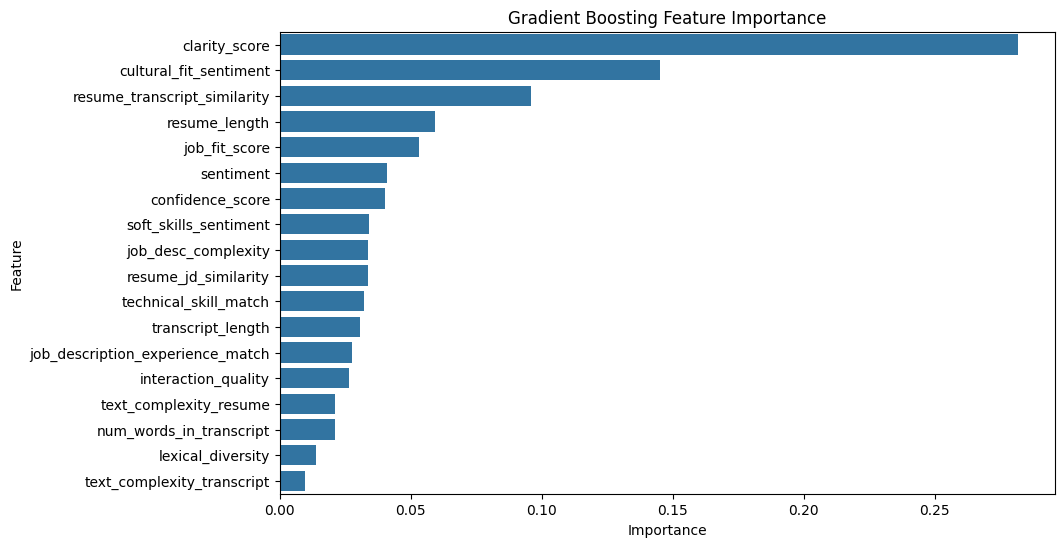

Summary of Feature Importance (Gradient Boosting):
The plot above shows the feature importance in the Gradient Boosting model. Features with higher importance have a stronger influence on the model's predictions.

Top 5 most impactful features:
clarity_score: Importance = 0.2817
cultural_fit_sentiment: Importance = 0.1450
resume_transcript_similarity: Importance = 0.0959
resume_length: Importance = 0.0592
job_fit_score: Importance = 0.0530


In [176]:
# --- Gradient Boosting Feature Importance Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=gb_impact_analysis)
plt.title('Gradient Boosting Feature Importance')
plt.show()

# --- Summary ---
top_gb_features = gb_impact_analysis.head(5)  # Top 5 features by importance

# Summarizing the plot
print("Summary of Feature Importance (Gradient Boosting):")
print(f"The plot above shows the feature importance in the Gradient Boosting model. Features with higher importance have a stronger influence on the model's predictions.")
print("\nTop 5 most impactful features:")
for i, row in top_gb_features.iterrows():
    print(f"{row['Feature']}: Importance = {row['Importance']:.4f}")


In [177]:
#K-Nearest Neighbors (KNN) 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

# KNN Hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

knn_best = grid_search.best_estimator_
knn_y_pred = knn_best.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_roc_auc = roc_auc_score(y_test, knn_best.predict_proba(X_test)[:, 1])

In [179]:
print(f'KNN Accuracy: {knn_accuracy * 100:.2f}%')
print(f'KNN ROC AUC: {knn_roc_auc:.4f}')



KNN Accuracy: 76.22%
KNN ROC AUC: 0.8397


In [180]:
# Error Analysis
knn_errors = X_test.copy()
knn_errors['True Label'] = y_test
knn_errors['Predicted Label'] = knn_best.predict(X_test)
knn_errors['Error'] = knn_errors['True Label'] != knn_errors['Predicted Label']

# Display a few misclassified instances
misclassified_knn = knn_errors[knn_errors['Error'] == True]
print("Misclassified Instances (KNN):")
print(misclassified_knn.head())


Misclassified Instances (KNN):
      num_words_in_transcript  resume_jd_similarity  \
1655                      648              0.250854   
1771                      735              0.204282   
1691                      566              0.249908   
2728                      716              0.119999   
2630                      792              0.112415   

      resume_transcript_similarity  sentiment  transcript_length  \
1655                      0.397662     0.9947                648   
1771                      0.369067     0.9972                735   
1691                      0.416056     0.9964                566   
2728                      0.477884     0.9987                716   
2630                      0.545925     0.9988                792   

      resume_length  job_description_experience_match  \
1655            337                                10   
1771            361                                10   
1691            386                                 9   
2

In [163]:
# Counting the total number of misclassified instances
misclassified_count = len(misclassified_knn)

# Professional phrasing
total_misclassified = f"Total number of misclassified instances: {misclassified_count}"
total_misclassified


'Total number of misclassified instances: 151'

In [76]:
# Impact Analysis (using permutation importance)
from sklearn.inspection import permutation_importance
knn_perm_importance = permutation_importance(knn_best, X_test, y_test, n_repeats=10, random_state=42)
knn_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': knn_perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Displaying impact
print("Impact Analysis (KNN):")
print(knn_feature_importance_df)


Impact Analysis (KNN):
                             Feature  Importance
5                      resume_length    0.078583
6   job_description_experience_match    0.040630
16               job_desc_complexity    0.036850
15                     clarity_score    0.035591
14                  confidence_score    0.002835
4                  transcript_length    0.002362
12            cultural_fit_sentiment    0.001575
8             text_complexity_resume    0.000945
10             technical_skill_match    0.000945
13                     job_fit_score    0.000787
9                  lexical_diversity    0.000315
7         text_complexity_transcript    0.000315
3                          sentiment    0.000157
11             soft_skills_sentiment    0.000000
1               resume_jd_similarity   -0.000157
2       resume_transcript_similarity   -0.000945
0            num_words_in_transcript   -0.001575
17               interaction_quality   -0.008661


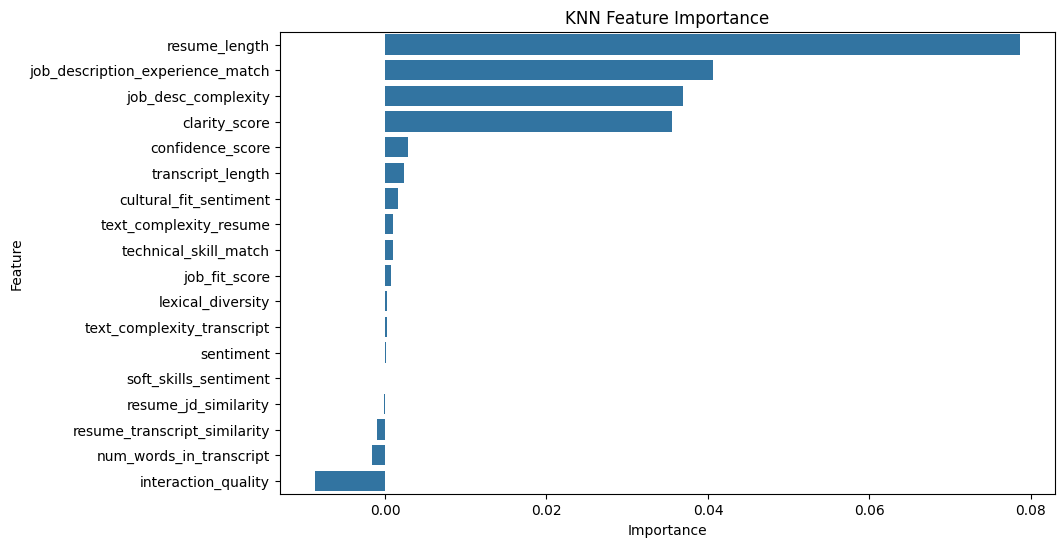

Summary of Feature Importance (KNN):
The plot above shows the feature importance in the KNN model using permutation importance. Features with higher importance have a stronger influence on the model's predictions.

Top 5 most impactful features:
resume_length: Importance = 0.0786
job_description_experience_match: Importance = 0.0406
job_desc_complexity: Importance = 0.0369
clarity_score: Importance = 0.0356
confidence_score: Importance = 0.0028


In [181]:
# --- KNN Feature Importance using Permutation Importance ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=knn_feature_importance_df)
plt.title('KNN Feature Importance')
plt.show()

# --- Summary ---
top_knn_features = knn_feature_importance_df.head(5)  # Top 5 features by importance

# Summarizing the plot
print("Summary of Feature Importance (KNN):")
print(f"The plot above shows the feature importance in the KNN model using permutation importance. Features with higher importance have a stronger influence on the model's predictions.")
print("\nTop 5 most impactful features:")
for i, row in top_knn_features.iterrows():
    print(f"{row['Feature']}: Importance = {row['Importance']:.4f}")


In [184]:
#LightGBM 

import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

param_grid = {
    'num_leaves': [31, 63, 127],
    'max_depth': [-1, 3, 5],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 150]
}

lgbm = lgb.LGBMClassifier(random_state=42, verbose=-1)  # Add verbose=-1 to suppress logs
grid_search = GridSearchCV(lgbm, param_grid, cv=5, scoring='accuracy', n_jobs=1)
grid_search.fit(X_train, y_train)

lgbm_best = grid_search.best_estimator_
lgbm_y_pred = lgbm_best.predict(X_test)

lgbm_accuracy = accuracy_score(y_test, lgbm_y_pred)
lgbm_roc_auc = roc_auc_score(y_test, lgbm_best.predict_proba(X_test)[:, 1])



In [185]:
print(f'LightGBM Accuracy: {lgbm_accuracy * 100:.2f}%')
print(f'LightGBM ROC AUC: {lgbm_roc_auc:.4f}')

LightGBM Accuracy: 88.35%
LightGBM ROC AUC: 0.9712


In [186]:
# Adding true and predicted labels to the test set
lgbm_errors = X_test.copy()
lgbm_errors['True Label'] = y_test
lgbm_errors['Predicted Label'] = lgbm_best.predict(X_test)

# Identifying misclassified instances
lgbm_errors['Error'] = lgbm_errors['True Label'] != lgbm_errors['Predicted Label']
misclassified_lgbm = lgbm_errors[lgbm_errors['Error'] == True]

# Displaying a few misclassified instances
print("Misclassified Instances (LightGBM):")
print(misclassified_lgbm.head())

# Total count of misclassified instances



Misclassified Instances (LightGBM):
      num_words_in_transcript  resume_jd_similarity  \
1771                      735              0.204282   
1566                      636              0.256930   
1850                      636              0.181735   
1691                      566              0.249908   
2749                      700              0.168350   

      resume_transcript_similarity  sentiment  transcript_length  \
1771                      0.369067     0.9972                735   
1566                      0.296303     0.9994                636   
1850                      0.291331     0.9979                636   
1691                      0.416056     0.9964                566   
2749                      0.616727     0.9991                700   

      resume_length  job_description_experience_match  \
1771            361                                10   
1566            312                                10   
1850            325                                 8

In [164]:
# Counting the total number of misclassified instances
misclassified_count = len(misclassified_lgbm)

# Professional phrasing
total_misclassified = f"Total number of misclassified instances: {misclassified_count}"
total_misclassified


'Total number of misclassified instances: 74'

In [82]:
# Permutation importance
lgbm_perm_importance = permutation_importance(lgbm_best, X_test, y_test, n_repeats=10, random_state=42)
lgbm_feature_importance_df_perm = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': lgbm_perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Displaying impact
print("Impact Analysis (Permutation Importance - LightGBM):")
print(lgbm_feature_importance_df_perm)

Impact Analysis (Permutation Importance - LightGBM):
                             Feature  Importance
12            cultural_fit_sentiment    0.087559
2       resume_transcript_similarity    0.045039
5                      resume_length    0.022047
15                     clarity_score    0.018425
1               resume_jd_similarity    0.017165
11             soft_skills_sentiment    0.010866
13                     job_fit_score    0.010551
3                          sentiment    0.009449
14                  confidence_score    0.006614
10             technical_skill_match    0.005669
6   job_description_experience_match    0.004882
4                  transcript_length    0.004724
0            num_words_in_transcript    0.003622
8             text_complexity_resume    0.002362
7         text_complexity_transcript    0.001102
17               interaction_quality   -0.000630
16               job_desc_complexity   -0.000945
9                  lexical_diversity   -0.001890


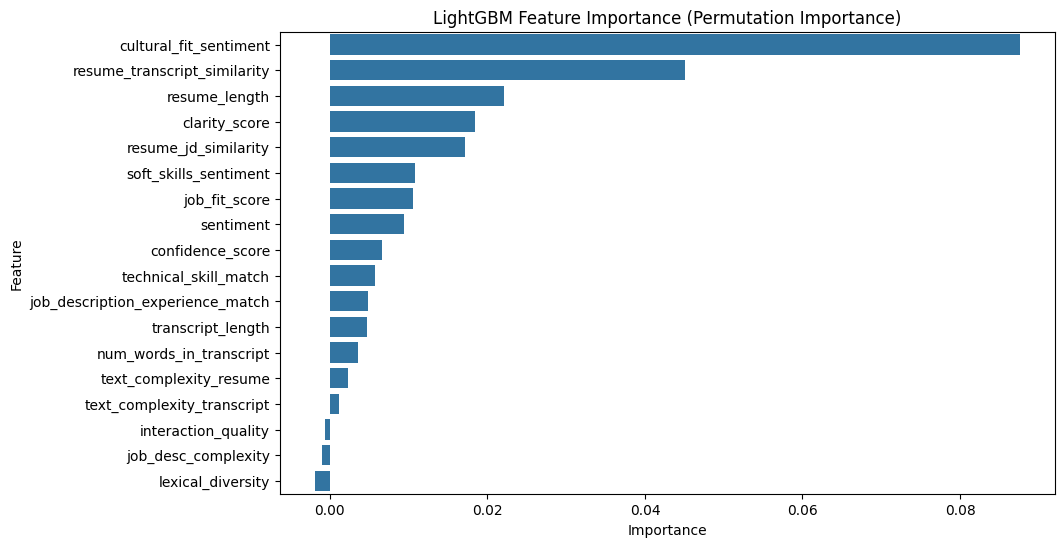

Summary of Feature Importance (LightGBM):
The plot above shows the feature importance in the LightGBM model using permutation importance. Features with higher importance have a stronger influence on the model's predictions.

Top 5 most impactful features:
cultural_fit_sentiment: Importance = 0.0876
resume_transcript_similarity: Importance = 0.0450
resume_length: Importance = 0.0220
clarity_score: Importance = 0.0184
resume_jd_similarity: Importance = 0.0172


In [187]:
# --- LightGBM Feature Importance using Permutation Importance ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=lgbm_feature_importance_df_perm)
plt.title('LightGBM Feature Importance (Permutation Importance)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# --- Summary ---
top_lgbm_features = lgbm_feature_importance_df_perm.head(5)  # Top 5 features by importance

# Summarizing the plot
print("Summary of Feature Importance (LightGBM):")
print(f"The plot above shows the feature importance in the LightGBM model using permutation importance. Features with higher importance have a stronger influence on the model's predictions.")
print("\nTop 5 most impactful features:")
for i, row in top_lgbm_features.iterrows():
    print(f"{row['Feature']}: Importance = {row['Importance']:.4f}")


In [ ]:
#AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

# AdaBoost Classifier with Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5]
}

# Specify the 'SAMME' algorithm explicitly to avoid the FutureWarning
ada_boost = AdaBoostClassifier(random_state=42, algorithm='SAMME')

grid_search = GridSearchCV(ada_boost, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

ada_boost_best = grid_search.best_estimator_
ada_boost_y_pred = ada_boost_best.predict(X_test)

ada_boost_accuracy = accuracy_score(y_test, ada_boost_y_pred)
ada_boost_roc_auc = roc_auc_score(y_test, ada_boost_best.predict_proba(X_test)[:, 1])


AdaBoost Accuracy: 0.8440944881889764
AdaBoost ROC AUC: 0.9445904924407761


In [189]:
print(f'AdaBoost Accuracy: {ada_boost_accuracy * 100:.2f}%')
print(f'AdaBoost ROC AUC: {ada_boost_roc_auc:.4f}')

AdaBoost Accuracy: 84.41%
AdaBoost ROC AUC: 0.9446


In [190]:
adaboost_errors = X_test.copy()
adaboost_errors['True Label'] = y_test
adaboost_errors['Predicted Label'] = ada_boost_best.predict(X_test)
adaboost_errors['Error'] = adaboost_errors['True Label'] != adaboost_errors['Predicted Label']

# Display a few misclassified instances
misclassified_adaboost = adaboost_errors[adaboost_errors['Error'] == True]
print("Misclassified Instances (AdaBoost):")
print(misclassified_adaboost.head())


Misclassified Instances (AdaBoost):
      num_words_in_transcript  resume_jd_similarity  \
1771                      735              0.204282   
1566                      636              0.256930   
2749                      700              0.168350   
1551                      539              0.335625   
1545                      692              0.262194   

      resume_transcript_similarity  sentiment  transcript_length  \
1771                      0.369067     0.9972                735   
1566                      0.296303     0.9994                636   
2749                      0.616727     0.9991                700   
1551                      0.430371     0.9967                539   
1545                      0.440317     0.9982                692   

      resume_length  job_description_experience_match  \
1771            361                                10   
1566            312                                10   
2749            488                                 7

In [191]:
# Counting the total number of misclassified instances
misclassified_count = len(misclassified_adaboost)

# Professional phrasing
total_misclassified = f"Total number of misclassified instances: {misclassified_count}"
total_misclassified


'Total number of misclassified instances: 99'

In [192]:
adaboost_feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': ada_boost_best.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Impact Analysis (AdaBoost):")
print(adaboost_feature_importance_df)



Impact Analysis (AdaBoost):
                             Feature  Importance
12            cultural_fit_sentiment    0.332746
2       resume_transcript_similarity    0.205097
13                     job_fit_score    0.071811
14                  confidence_score    0.067833
5                      resume_length    0.061493
10             technical_skill_match    0.055455
4                  transcript_length    0.044414
15                     clarity_score    0.041124
1               resume_jd_similarity    0.035934
7         text_complexity_transcript    0.026509
17               interaction_quality    0.018134
3                          sentiment    0.016415
11             soft_skills_sentiment    0.011779
8             text_complexity_resume    0.011256
16               job_desc_complexity    0.000000
0            num_words_in_transcript    0.000000
6   job_description_experience_match    0.000000
9                  lexical_diversity    0.000000


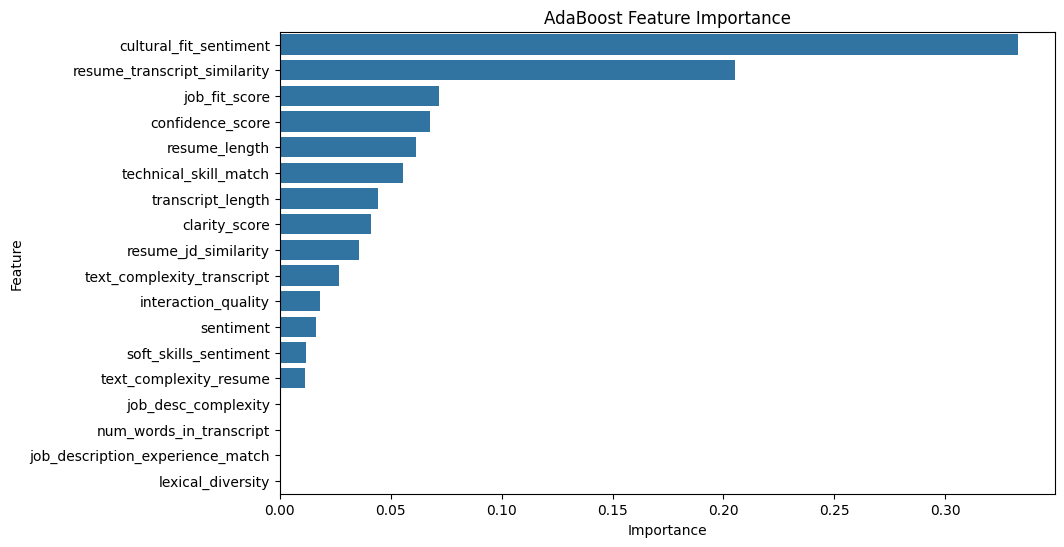

Summary of Feature Importance (AdaBoost):
The plot above shows the feature importance in the AdaBoost model. Features with higher importance have a stronger influence on the model's predictions.

Top 5 most impactful features:
cultural_fit_sentiment: Importance = 0.3327
resume_transcript_similarity: Importance = 0.2051
job_fit_score: Importance = 0.0718
confidence_score: Importance = 0.0678
resume_length: Importance = 0.0615


In [193]:
# --- AdaBoost Feature Importance ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=adaboost_feature_importance_df)
plt.title('AdaBoost Feature Importance')
plt.show()

# --- Summary ---
top_adaboost_features = adaboost_feature_importance_df.head(5)  # Top 5 features by importance

# Summarizing the plot
print("Summary of Feature Importance (AdaBoost):")
print(f"The plot above shows the feature importance in the AdaBoost model. Features with higher importance have a stronger influence on the model's predictions.")
print("\nTop 5 most impactful features:")
for i, row in top_adaboost_features.iterrows():
    print(f"{row['Feature']}: Importance = {row['Importance']:.4f}")


In [90]:
#CatBoost

from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

#CatBoost with Hyperparameter Tuning
param_grid = {
    'depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'iterations': [50, 100, 150]
}

catboost = CatBoostClassifier(silent=True, random_state=42)
grid_search = GridSearchCV(catboost, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

catboost_best = grid_search.best_estimator_
catboost_y_pred = catboost_best.predict(X_test)

catboost_accuracy = accuracy_score(y_test, catboost_y_pred)
catboost_roc_auc = roc_auc_score(y_test, catboost_best.predict_proba(X_test)[:, 1])

In [91]:
print(f'CatBoost Accuracy: {catboost_accuracy * 100:.2f}%')
print(f'CatBoost ROC AUC: {catboost_roc_auc:.4f}')

CatBoost Accuracy: 87.40%
CatBoost ROC AUC: 0.9665


In [92]:
catboost_errors = X_test.copy()
catboost_errors['True Label'] = y_test
catboost_errors['Predicted Label'] = catboost_best.predict(X_test)
catboost_errors['Error'] = catboost_errors['True Label'] != catboost_errors['Predicted Label']

# Display a few misclassified instances
misclassified_catboost = catboost_errors[catboost_errors['Error'] == True]
print("Misclassified Instances (CatBoost):")
print(misclassified_catboost.head())


Misclassified Instances (CatBoost):
      num_words_in_transcript  resume_jd_similarity  \
1655                      648              0.250854   
1566                      636              0.256930   
1850                      636              0.181735   
1691                      566              0.249908   
1551                      539              0.335625   

      resume_transcript_similarity  sentiment  transcript_length  \
1655                      0.397662     0.9947                648   
1566                      0.296303     0.9994                636   
1850                      0.291331     0.9979                636   
1691                      0.416056     0.9964                566   
1551                      0.430371     0.9967                539   

      resume_length  job_description_experience_match  \
1655            337                                10   
1566            312                                10   
1850            325                                 8

In [166]:
# Counting the total number of misclassified instances
misclassified_count = len(misclassified_catboost)

# Professional phrasing
total_misclassified = f"Total number of misclassified instances: {misclassified_count}"
total_misclassified


'Total number of misclassified instances: 80'

In [94]:
catboost_feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': catboost_best.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Impact Analysis (CatBoost):")
print(catboost_feature_importance_df)



Impact Analysis (CatBoost):
                             Feature  Importance
12            cultural_fit_sentiment   13.458071
13                     job_fit_score    9.083382
2       resume_transcript_similarity    9.072881
15                     clarity_score    8.847458
1               resume_jd_similarity    8.141185
10             technical_skill_match    7.733198
5                      resume_length    7.698069
11             soft_skills_sentiment    6.211241
6   job_description_experience_match    4.898754
14                  confidence_score    4.007651
3                          sentiment    3.524402
16               job_desc_complexity    3.307981
9                  lexical_diversity    2.945306
8             text_complexity_resume    2.617099
17               interaction_quality    2.601158
0            num_words_in_transcript    2.343461
7         text_complexity_transcript    1.895673
4                  transcript_length    1.613030


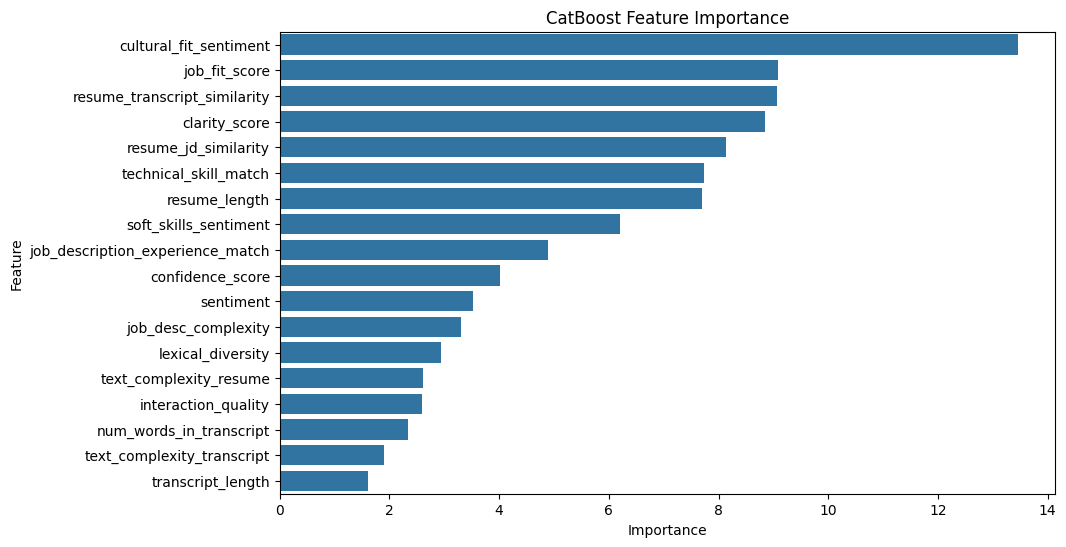

Summary of Feature Importance (CatBoost):
The plot above shows the feature importance in the CatBoost model. Features with higher importance have a stronger influence on the model's predictions.

Top 5 most impactful features:
cultural_fit_sentiment: Importance = 13.4581
job_fit_score: Importance = 9.0834
resume_transcript_similarity: Importance = 9.0729
clarity_score: Importance = 8.8475
resume_jd_similarity: Importance = 8.1412


In [194]:
# --- CatBoost Feature Importance ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=catboost_feature_importance_df)
plt.title('CatBoost Feature Importance')
plt.show()

# --- Summary ---
top_catboost_features = catboost_feature_importance_df.head(5)  # Top 5 features by importance

# Summarizing the plot
print("Summary of Feature Importance (CatBoost):")
print(f"The plot above shows the feature importance in the CatBoost model. Features with higher importance have a stronger influence on the model's predictions.")
print("\nTop 5 most impactful features:")
for i, row in top_catboost_features.iterrows():
    print(f"{row['Feature']}: Importance = {row['Importance']:.4f}")


In [96]:
#Neural Network (MLPClassifier)

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

#Neural Network (MLPClassifier) with Hyperparameter Tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive']
}

mlp = MLPClassifier(max_iter=1000, random_state=42)
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

mlp_best = grid_search.best_estimator_
mlp_y_pred = mlp_best.predict(X_test)

mlp_accuracy = accuracy_score(y_test, mlp_y_pred)
mlp_roc_auc = roc_auc_score(y_test, mlp_best.predict_proba(X_test)[:, 1])

In [97]:
print(f'MLP Accuracy: {mlp_accuracy * 100:.2f}%')
print(f'MLP ROC AUC: {mlp_roc_auc:.4f}')

MLP Accuracy: 73.86%
MLP ROC AUC: 0.8508


In [98]:
mlp_errors = X_test.copy()
mlp_errors['True Label'] = y_test
mlp_errors['Predicted Label'] = mlp_best.predict(X_test)
mlp_errors['Error'] = mlp_errors['True Label'] != mlp_errors['Predicted Label']

# Display a few misclassified instances
misclassified_mlp = mlp_errors[mlp_errors['Error'] == True]
print("Misclassified Instances (MLPClassifier):")
print(misclassified_mlp.head())


Misclassified Instances (MLPClassifier):
      num_words_in_transcript  resume_jd_similarity  \
2563                      774              0.165517   
1566                      636              0.256930   
1850                      636              0.181735   
3115                      847              0.269972   
2749                      700              0.168350   

      resume_transcript_similarity  sentiment  transcript_length  \
2563                      0.506998     0.9971                774   
1566                      0.296303     0.9994                636   
1850                      0.291331     0.9979                636   
3115                      0.380608     0.9990                847   
2749                      0.616727     0.9991                700   

      resume_length  job_description_experience_match  \
2563            373                                 7   
1566            312                                10   
1850            325                             

In [167]:
# Counting the total number of misclassified instances
misclassified_count = len(misclassified_mlp)

# Professional phrasing
total_misclassified = f"Total number of misclassified instances: {misclassified_count}"
total_misclassified


'Total number of misclassified instances: 166'

In [100]:
mlp_perm_importance = permutation_importance(mlp_best, X_test, y_test, n_repeats=10, random_state=42)
mlp_feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': mlp_perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print("Impact Analysis (MLPClassifier):")
print(mlp_feature_importance_df)




Impact Analysis (MLPClassifier):
                             Feature  Importance
0            num_words_in_transcript    0.243937
17               interaction_quality    0.086142
4                  transcript_length    0.081732
5                      resume_length    0.052283
12            cultural_fit_sentiment    0.037008
15                     clarity_score    0.022362
14                  confidence_score    0.017008
16               job_desc_complexity    0.015591
6   job_description_experience_match    0.004724
11             soft_skills_sentiment    0.004252
1               resume_jd_similarity    0.002520
10             technical_skill_match    0.002205
9                  lexical_diversity    0.002205
13                     job_fit_score    0.001260
2       resume_transcript_similarity    0.000315
3                          sentiment    0.000000
7         text_complexity_transcript   -0.001417
8             text_complexity_resume   -0.002677


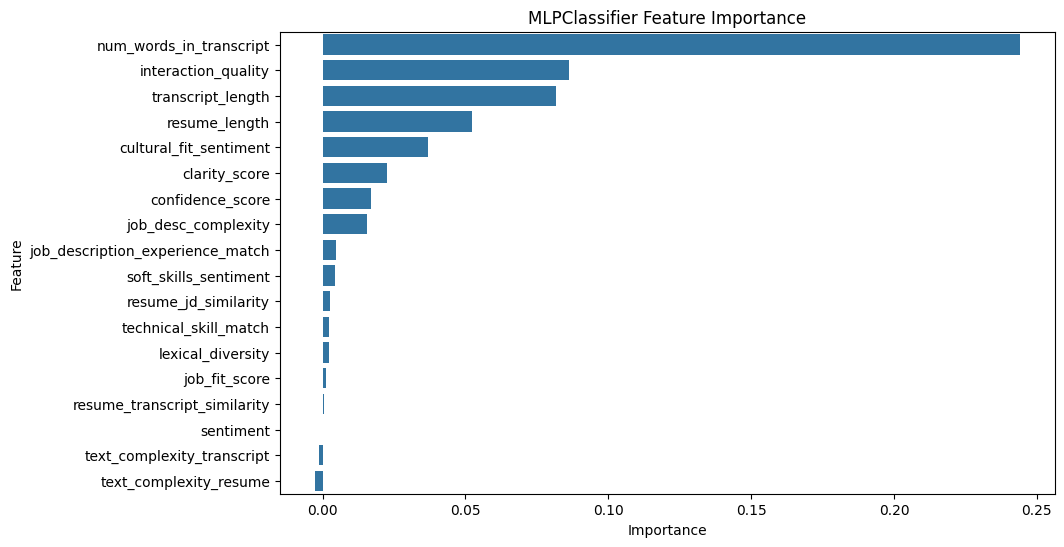

Summary of Feature Importance (MLPClassifier):
The plot above shows the feature importance in the MLPClassifier model. Features with higher importance have a stronger influence on the model's predictions.

Top 5 most impactful features:
num_words_in_transcript: Importance = 0.2439
interaction_quality: Importance = 0.0861
transcript_length: Importance = 0.0817
resume_length: Importance = 0.0523
cultural_fit_sentiment: Importance = 0.0370


In [195]:
# --- MLPClassifier Feature Importance ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=mlp_feature_importance_df)
plt.title('MLPClassifier Feature Importance')
plt.show()

# --- Summary ---
top_mlp_features = mlp_feature_importance_df.head(5)  # Top 5 features by importance

# Summarizing the plot
print("Summary of Feature Importance (MLPClassifier):")
print(f"The plot above shows the feature importance in the MLPClassifier model. Features with higher importance have a stronger influence on the model's predictions.")
print("\nTop 5 most impactful features:")
for i, row in top_mlp_features.iterrows():
    print(f"{row['Feature']}: Importance = {row['Importance']:.4f}")


                  Model  Accuracy (%)   ROC AUC
7              LightGBM     88.346457  0.971162
3               XGBoost     87.716535  0.967472
2         Random Forest     87.401575  0.965626
9              CatBoost     87.401575  0.966519
6     Gradient Boosting     87.244094  0.966003
1         Decision Tree     84.409449  0.910961
8              AdaBoost     84.409449  0.944590
4                   SVM     82.204724  0.901720
0   Logistic Regression     81.259843  0.902752
5                   KNN     76.220472  0.839674
10                  MLP     73.858268  0.850849


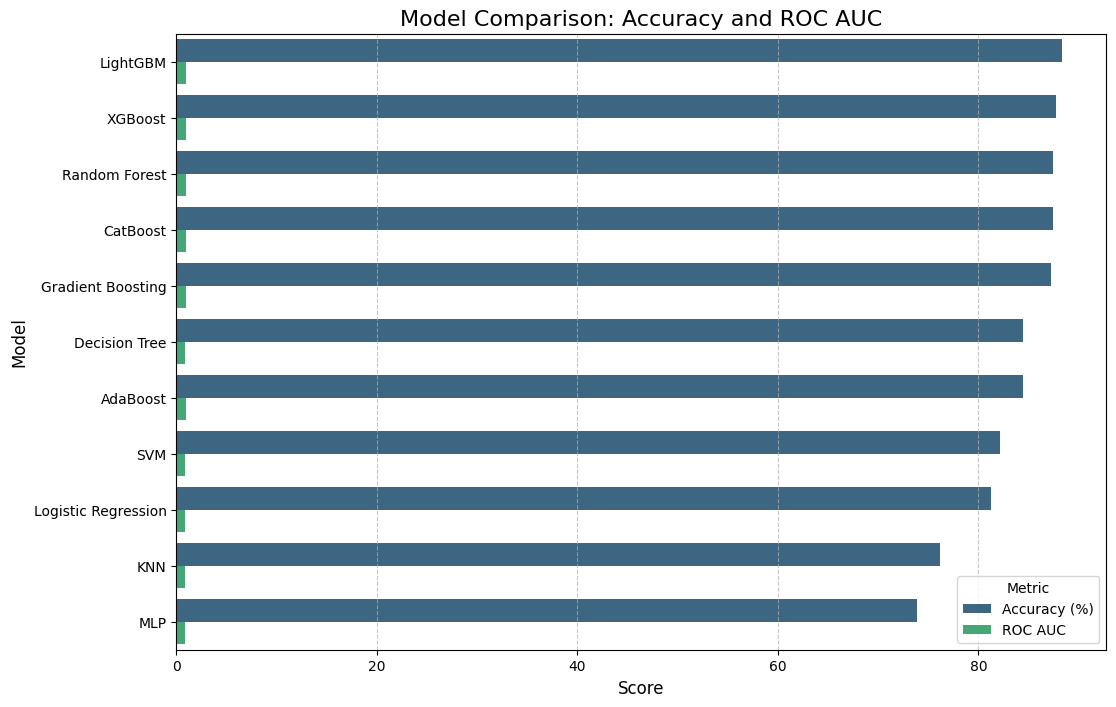


Summary of the Model Comparison:
1. The best-performing model based on Accuracy is: LightGBM with an Accuracy of 88.35%.
2. The best-performing model based on ROC AUC is: LightGBM with a ROC AUC score of 0.97.
3. The comparison highlights the trade-offs between Accuracy and ROC AUC across models.


In [196]:
models = [
    'Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 
    'SVM', 'KNN', 'Gradient Boosting', 'LightGBM', 
    'AdaBoost', 'CatBoost', 'MLP'
]
accuracies = [log_reg_accuracy, dt_accuracy, rf_accuracy, xgb_accuracy, 
              svm_accuracy, knn_accuracy, gb_accuracy, lgbm_accuracy, 
              ada_boost_accuracy, catboost_accuracy, mlp_accuracy]
roc_auc_scores = [log_reg_roc_auc, dt_roc_auc, rf_roc_auc, xgb_roc_auc, 
                  svm_roc_auc, knn_roc_auc, gb_roc_auc, lgbm_roc_auc, 
                  ada_boost_roc_auc, catboost_roc_auc, mlp_roc_auc]

# Convert accuracies to percentages
accuracies_percent = [acc * 100 for acc in accuracies]

# Creating a DataFrame for easy comparison
comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy (%)': accuracies_percent,
    'ROC AUC': roc_auc_scores
})

# Sorting the models based on accuracy
comparison_df_sorted = comparison_df.sort_values(by='Accuracy (%)', ascending=False)
print(comparison_df_sorted)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(
    data=comparison_df_sorted.melt(id_vars='Model', value_vars=['Accuracy (%)', 'ROC AUC']),
    x='value', y='Model', hue='variable', palette='viridis'
)
plt.title('Model Comparison: Accuracy and ROC AUC', fontsize=16)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.legend(title='Metric', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
# Printing summary
print("\nSummary of the Model Comparison:")
print("1. The best-performing model based on Accuracy is:", 
      comparison_df_sorted.iloc[0]['Model'], 
      "with an Accuracy of", 
      f"{comparison_df_sorted.iloc[0]['Accuracy (%)']:.2f}%.")
print("2. The best-performing model based on ROC AUC is:", 
      comparison_df_sorted.sort_values(by='ROC AUC', ascending=False).iloc[0]['Model'], 
      "with a ROC AUC score of", 
      f"{comparison_df_sorted.sort_values(by='ROC AUC', ascending=False).iloc[0]['ROC AUC']:.2f}.")
print("3. The comparison highlights the trade-offs between Accuracy and ROC AUC across models.")

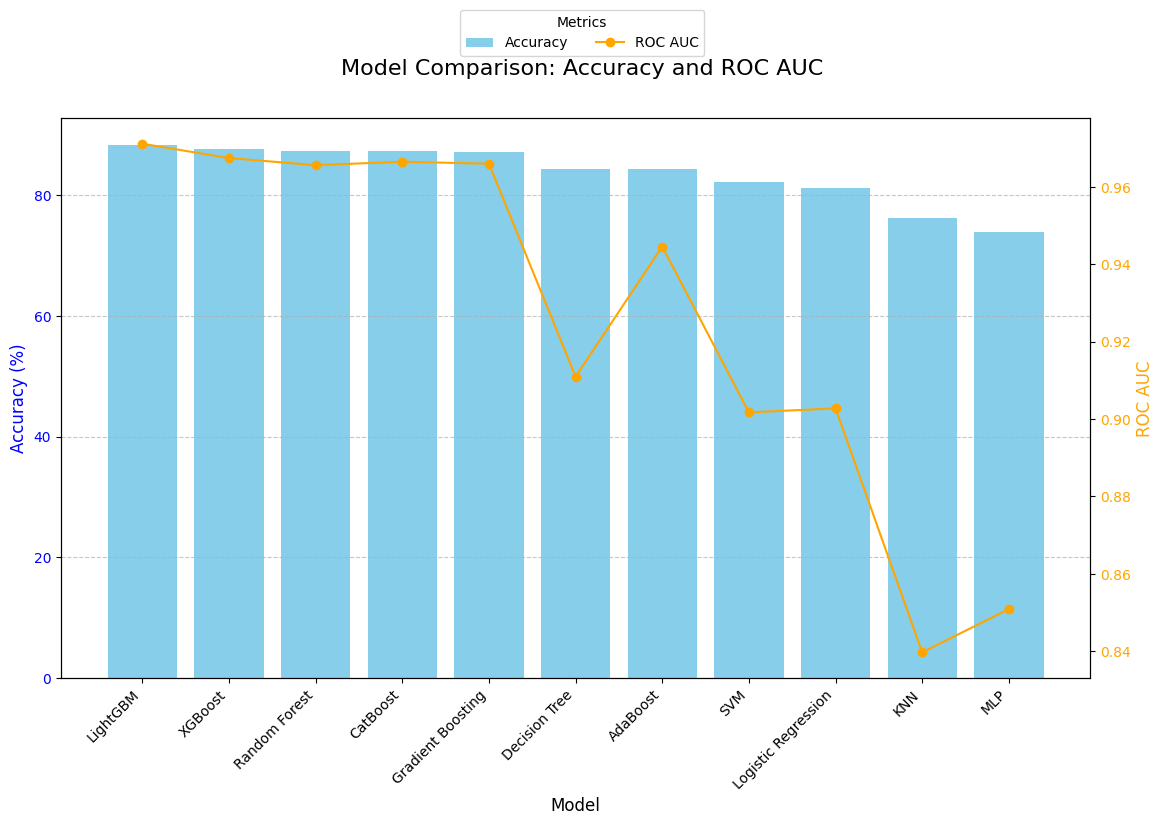


--- Summary of the Model Comparison ---
This visualization compares the performance of various machine learning models based on two metrics: Accuracy (%) and ROC AUC.

Key Observations:
1. The highest accuracy is achieved by: LightGBM with an accuracy of 88.35%.
2. The model with the best ROC AUC score is: LightGBM with a score of 0.97.
3. Models generally show a trade-off between accuracy and ROC AUC.
4. Accuracy is represented as a bar chart, while ROC AUC is represented as a line plot for better visual distinction.

Conclusion:
This comparison helps in selecting the most suitable model based on the specific metric of interest, such as higher accuracy or better classification performance (ROC AUC).


In [197]:
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for Accuracy
ax1.bar(range(len(comparison_df_sorted)), comparison_df_sorted['Accuracy (%)'], color='skyblue', label='Accuracy')
ax1.set_xlabel('Model', fontsize=12)
ax1.set_ylabel('Accuracy (%)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Set xticks and labels
ax1.set_xticks(range(len(comparison_df_sorted)))
ax1.set_xticklabels(comparison_df_sorted['Model'], rotation=45, ha='right')

# Gridlines
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Line plot for ROC AUC
ax2 = ax1.twinx()
ax2.plot(range(len(comparison_df_sorted)), comparison_df_sorted['ROC AUC'], color='orange', marker='o', label='ROC AUC')
ax2.set_ylabel('ROC AUC', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and Combined Legend
fig.suptitle('Model Comparison: Accuracy and ROC AUC', fontsize=16)
fig.tight_layout(pad=2)
lines, labels = [], []
for ax in [ax1, ax2]:
    line, label = ax.get_legend_handles_labels()
    lines.extend(line)
    labels.extend(label)
fig.legend(lines, labels, loc='upper center', ncol=2, title="Metrics", bbox_to_anchor=(0.5, 1.05))

# Show the plot
plt.show()

# Documentation Summary
print("\n--- Summary of the Model Comparison ---")
print("This visualization compares the performance of various machine learning models based on two metrics: Accuracy (%) and ROC AUC.")
print("\nKey Observations:")
print("1. The highest accuracy is achieved by:", 
      comparison_df_sorted.iloc[0]['Model'], 
      "with an accuracy of", 
      f"{comparison_df_sorted.iloc[0]['Accuracy (%)']:.2f}%.")
print("2. The model with the best ROC AUC score is:", 
      comparison_df_sorted.sort_values(by='ROC AUC', ascending=False).iloc[0]['Model'], 
      "with a score of", 
      f"{comparison_df_sorted.sort_values(by='ROC AUC', ascending=False).iloc[0]['ROC AUC']:.2f}.")
print("3. Models generally show a trade-off between accuracy and ROC AUC.")
print("4. Accuracy is represented as a bar chart, while ROC AUC is represented as a line plot for better visual distinction.")
print("\nConclusion:")
print("This comparison helps in selecting the most suitable model based on the specific metric of interest, such as higher accuracy or better classification performance (ROC AUC).")
